In [1]:
import os
import sys
lib_path = os.path.abspath(os.path.join(os.path.abspath(''), 'functions/'))
sys.path.append(lib_path)
# need to append our functions dir to the path! 

import SD_raster_loading
import SD_NC_loading
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dalecLoad
import spectralConv
import seaborn as sns
import scipy as sp
from datetime import timedelta
import matplotlib.dates as mdates

In [2]:
pd.__version__

'2.0.3'

# Load SD data

- found that fit is a little better if I use the data from the slightly deeper part of the loch
- most points are approx the same, but some of the outliers work better!

In [3]:

#coord = [56.14693897799395, -3.923458784671348] # this is approx the location of the DALEC
coord = [56.146746528609306, -3.92285731543299] # this is perhaps a deeper part of the loch
sds_23 = SD_NC_loading.load_multiple_SDs('planetData/Airthrey-2023-Jul-Oct_psscene_analytic_8b_udm2/acoliteOutput/',
                                      coord, skipSameDay=False, pixel_grid_shape=(20,20))

sds_22 = SD_NC_loading.load_multiple_SDs('planetData/Aithrey_2022_Apr-Sept_psscene_analytic_8b_udm2/acoliteOutput/',
                                      coord, skipSameDay=False, pixel_grid_shape=(20,20))

sds_23_1 = SD_NC_loading.load_multiple_SDs('planetData/Aithrey2023-Apr-June_psscene_analytic_8b_udm2/acoliteOutput/',
                                      coord, skipSameDay=False, pixel_grid_shape=(20,20))

date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 f

In [4]:
sds = pd.concat([sds_22.reset_index(), sds_23_1.reset_index(), sds_23.reset_index()], axis=0)
sds

,Date,Wavelength,rho_s_53_84,rho_s_53_85,rho_s_53_86,rho_s_53_87,rho_s_53_88,rho_s_53_89,rho_s_53_90,rho_s_53_91,...,rho_s_72_94,rho_s_72_95,rho_s_72_96,rho_s_72_97,rho_s_72_98,rho_s_72_99,rho_s_72_100,rho_s_72_101,rho_s_72_102,rho_s_72_103
0,2022-04-19 10:47:11+00:00,444.0,0.008818,0.007039,0.005948,0.006094,0.006879,0.007623,0.008738,0.008698,...,0.006453,0.006813,0.007915,0.008234,0.008115,0.00644,0.006267,0.006919,0.00761,0.004909
1,2022-04-19 10:47:11+00:00,492.0,0.005823,0.005518,0.005024,0.004942,0.005165,0.004155,0.00426,0.004695,...,0.00513,0.005177,0.005024,0.004872,0.00466,0.00446,0.004308,0.00399,0.004155,0.004872
2,2022-04-19 10:47:11+00:00,533.0,0.005353,0.005401,0.005935,0.006093,0.005438,0.004733,0.004928,0.005401,...,0.005353,0.005486,0.005547,0.005389,0.005316,0.00534,0.00534,0.005377,0.005462,0.005474
3,2022-04-19 10:47:11+00:00,566.0,0.007951,0.007584,0.007706,0.00751,0.007547,0.007302,0.007571,0.007535,...,0.008196,0.007584,0.007951,0.007829,0.007718,0.007706,0.007277,0.007179,0.007608,0.00871
4,2022-04-19 10:47:11+00:00,612.0,0.007515,0.007184,0.008252,0.008303,0.007693,0.007451,0.007476,0.007744,...,0.006509,0.006636,0.006891,0.0067,0.006535,0.006598,0.007082,0.006955,0.006827,0.007209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2023-10-11 10:31:23+00:00,566.0,0.007727,0.00722,0.006694,0.007238,0.007689,0.008402,0.009172,0.009022,...,0.00767,0.007069,0.007107,0.007032,0.00675,0.007332,0.00737,0.00752,0.008177,0.007314
220,2023-10-11 10:31:23+00:00,612.0,0.008185,0.007754,0.007067,0.006205,0.006734,0.006852,0.006734,0.00791,...,0.006283,0.007518,0.007773,0.007714,0.007342,0.007028,0.007126,0.007048,0.006616,0.006146
221,2023-10-11 10:31:23+00:00,666.0,0.006569,0.00635,0.005831,0.005771,0.00639,0.006031,0.005552,0.005512,...,0.005731,0.005911,0.006131,0.00647,0.00649,0.006111,0.00625,0.006111,0.005791,0.00641
222,2023-10-11 10:31:23+00:00,707.0,0.008906,0.009523,0.009438,0.008906,0.007799,0.008246,0.008714,0.00931,...,0.008246,0.007309,0.007458,0.007799,0.008906,0.008885,0.008437,0.008778,0.008331,0.007564


# Load only clean data
Interestingly, this doesn't really affect the results. If anything, including data with haze, shadows etc. improves the fit of regression graphs as we get more data points!

Might be an idea to do a slightly more loose cleaning of the planet images - maybe shadows are fine?
Or I could include a flag column in the data and see if any particular types of error are causing issues?

- I think the blues will be most badly affected by haze, but we're not using these anyway
- I think shadow might not be such a big issue
- I'm not sure why some images appear blurry, but maybe these also aren't an issue...



In [5]:
# load list of good files from data review csv...
good_df = pd.read_csv('planetData/good_data_review.csv')
extra_good = good_df.copy()
# select everything except images with cloud cover
extra_good = good_df.copy()[good_df['flag'] != 'cloud']
# uncomment this line for selection of only 'good' images
#extra_good = good_df.copy()[good_df['atmospheric interference at measurement points'] == 'good']

good_files = []
for f in extra_good.filename:
    #good_files.append(f[1:5] + '_' + f[5:7] + '_' + f[7:9] + '_' + f[10:12]+ '_' + f[12:14]+ '_' + f[14:16])
    good_files.append(f[1:16])

good_dates = pd.to_datetime(good_files, format='%Y%m%d_%H%M%S', utc=True)
# remove bad dates
sds = sds[sds.Date.isin(good_dates)]

In [6]:
extra_good.filename[0][20:24]

'2429'

In [7]:
extra_good['Date'] = good_dates
extra_good['Sat_ID'] = [f[20:24] for f in extra_good.filename]
extra_good[['Date', 'Sat_ID', 'flag']]

,Date,Sat_ID,flag
0,2022-09-24 10:27:33+00:00,2429,good
1,2022-09-14 10:23:16+00:00,2448,good
2,2022-04-19 10:47:11+00:00,2276,good
3,2022-09-10 11:04:21+00:00,249c,good
4,2022-09-14 10:23:14+00:00,2448,good
...,...,...,...
105,2023-06-02 10:28:55+00:00,24c9,good
106,2023-05-30 10:20:20+00:00,2459,good
107,2023-04-15 10:24:33+00:00,2465,good
108,2023-04-15 10:24:30+00:00,2465,good


In [8]:
sds = sds.merge(extra_good[['Date', 'Sat_ID', 'flag']], on='Date')

In [9]:
sds['date'] = sds.Date.dt.date
sds.columns

Index(['Date', 'Wavelength', 'rho_s_53_84', 'rho_s_53_85', 'rho_s_53_86',
       'rho_s_53_87', 'rho_s_53_88', 'rho_s_53_89', 'rho_s_53_90',
       'rho_s_53_91',
       ...
       'rho_s_72_97', 'rho_s_72_98', 'rho_s_72_99', 'rho_s_72_100',
       'rho_s_72_101', 'rho_s_72_102', 'rho_s_72_103', 'Sat_ID', 'flag',
       'date'],
      dtype='object', length=405)

In [10]:
sds_melt = pd.melt(sds, id_vars=['Date', 'date', 'Wavelength', 'Sat_ID', 'flag'], var_name='location', value_name='Rrs')

In [11]:
sds_melt['Rrs'] =  sds_melt.Rrs.astype(float)

In [12]:
sds_melt

,Date,date,Wavelength,Sat_ID,flag,location,Rrs
0,2022-04-19 10:47:11+00:00,2022-04-19,444.0,2276,good,rho_s_53_84,0.008818
1,2022-04-19 10:47:11+00:00,2022-04-19,492.0,2276,good,rho_s_53_84,0.005823
2,2022-04-19 10:47:11+00:00,2022-04-19,533.0,2276,good,rho_s_53_84,0.005353
3,2022-04-19 10:47:11+00:00,2022-04-19,566.0,2276,good,rho_s_53_84,0.007951
4,2022-04-19 10:47:11+00:00,2022-04-19,612.0,2276,good,rho_s_53_84,0.007515
...,...,...,...,...,...,...,...
342395,2023-10-11 10:31:23+00:00,2023-10-11,566.0,2459,good,rho_s_72_103,0.007314
342396,2023-10-11 10:31:23+00:00,2023-10-11,612.0,2459,good,rho_s_72_103,0.006146
342397,2023-10-11 10:31:23+00:00,2023-10-11,666.0,2459,good,rho_s_72_103,0.006410
342398,2023-10-11 10:31:23+00:00,2023-10-11,707.0,2459,good,rho_s_72_103,0.007564


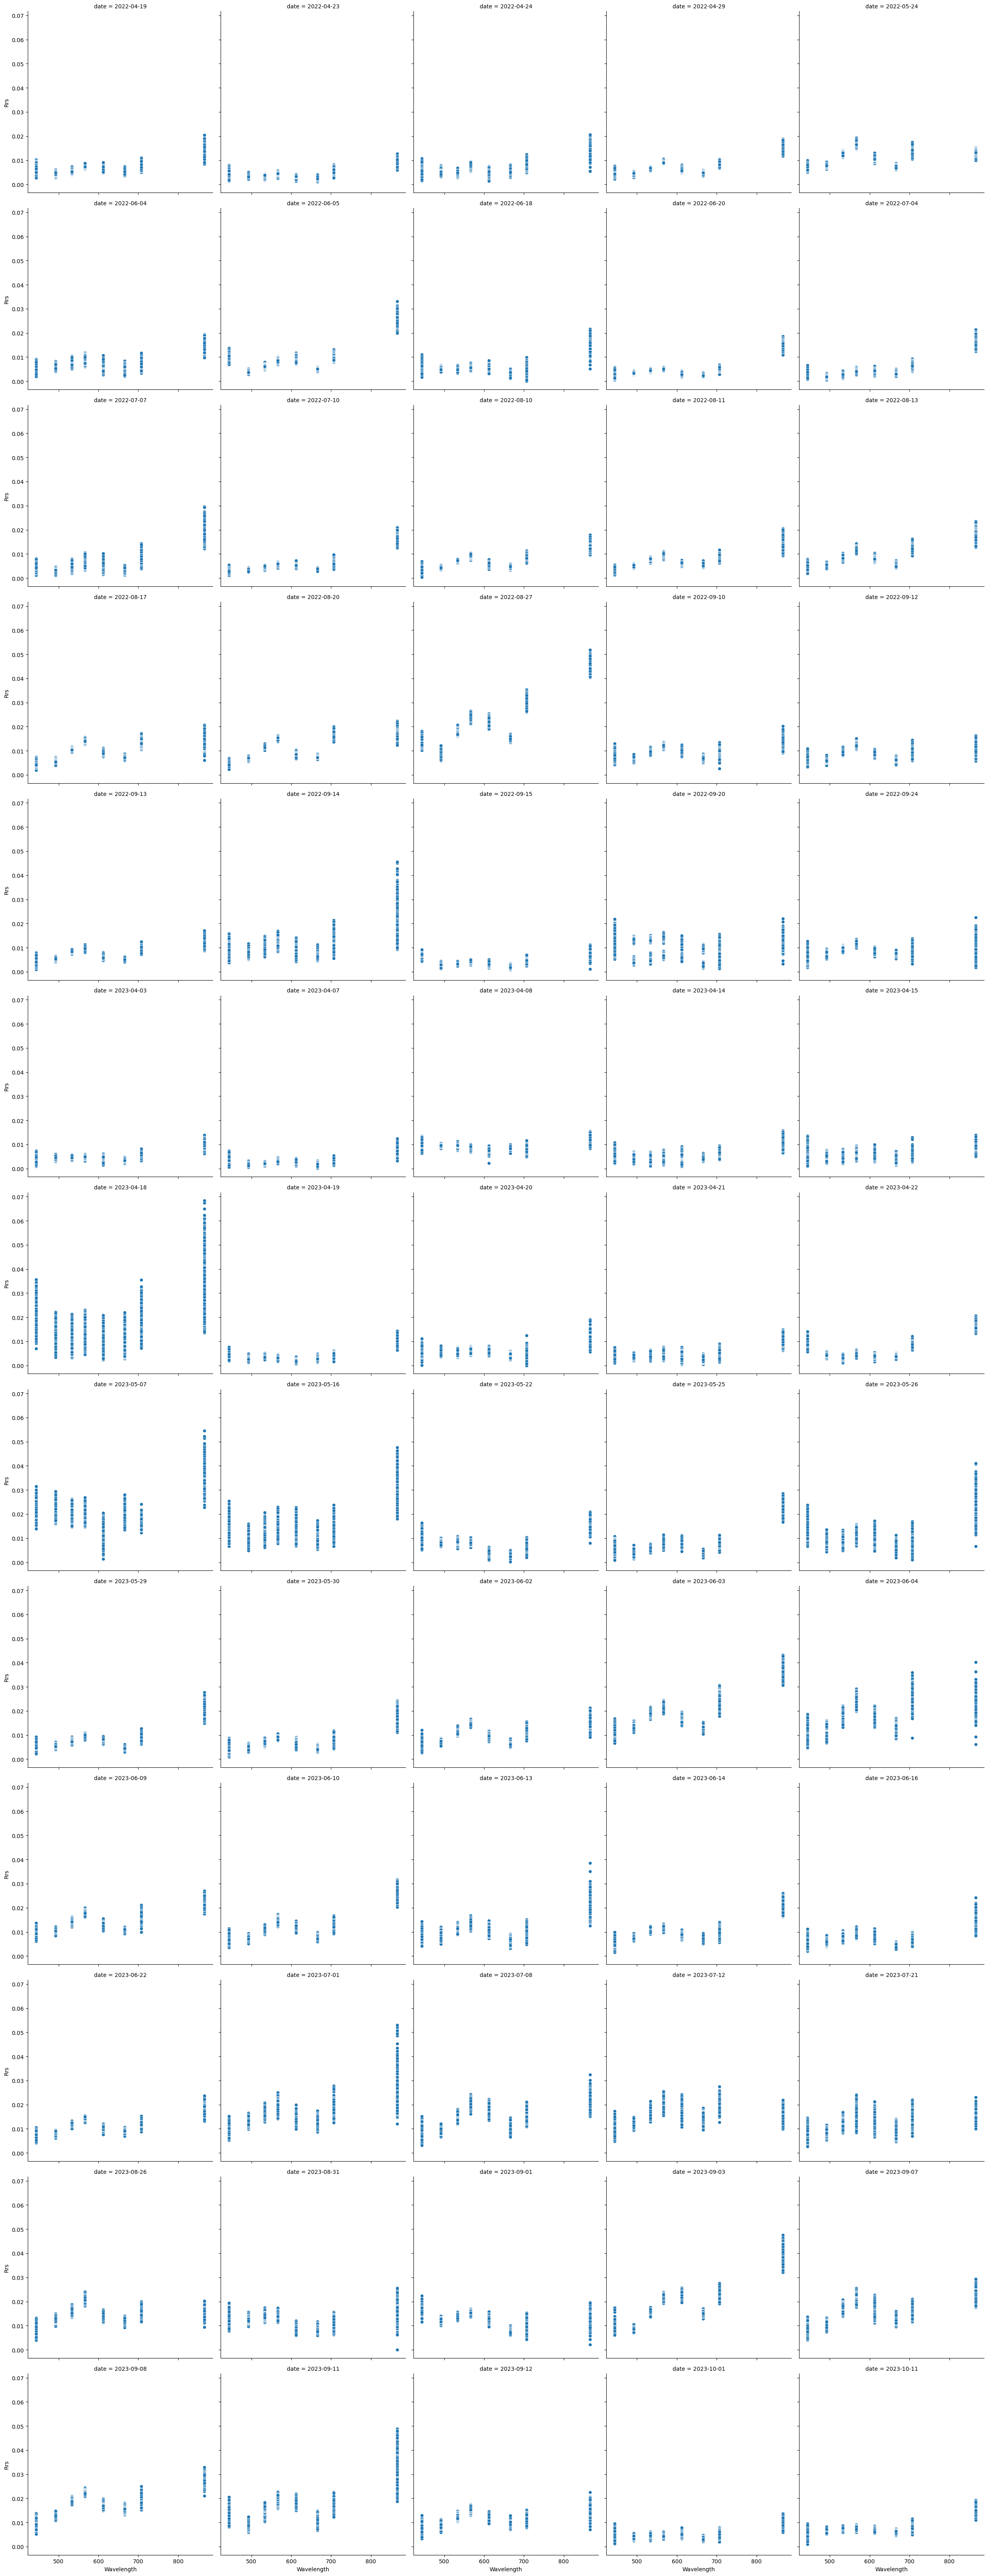

In [13]:
sns.relplot(data=sds_melt, x='Wavelength', y='Rrs', col='date', col_wrap=5, kind='scatter')

In [14]:
sds_med = sds_melt.drop(['location'], axis=1).groupby(['Date', 'date', 'Wavelength', 'Sat_ID', 'flag']).median()
sds_med.rename(columns={'Rrs':'Rrs_sd'}, inplace=True)
sds_med = sds_med.reset_index()
sds_med

,Date,date,Wavelength,Sat_ID,flag,Rrs_sd
0,2022-04-19 10:47:11+00:00,2022-04-19,444.0,2276,good,0.007039
1,2022-04-19 10:47:11+00:00,2022-04-19,492.0,2276,good,0.004813
2,2022-04-19 10:47:11+00:00,2022-04-19,533.0,2276,good,0.005523
3,2022-04-19 10:47:11+00:00,2022-04-19,566.0,2276,good,0.007792
4,2022-04-19 10:47:11+00:00,2022-04-19,612.0,2276,good,0.006974
...,...,...,...,...,...,...
851,2023-10-11 10:31:23+00:00,2023-10-11,566.0,2459,good,0.007558
852,2023-10-11 10:31:23+00:00,2023-10-11,612.0,2459,good,0.006793
853,2023-10-11 10:31:23+00:00,2023-10-11,666.0,2459,good,0.005991
854,2023-10-11 10:31:23+00:00,2023-10-11,707.0,2459,good,0.008331


In [15]:
sds_simple = sds_melt.drop(['Date', 'location', 'Sat_ID', 'flag'], axis=1)
sds_simple.rename(columns={'Rrs':'Rrs_sd'}, inplace=True)
sds_simple

,date,Wavelength,Rrs_sd
0,2022-04-19,444.0,0.008818
1,2022-04-19,492.0,0.005823
2,2022-04-19,533.0,0.005353
3,2022-04-19,566.0,0.007951
4,2022-04-19,612.0,0.007515
...,...,...,...
342395,2023-10-11,566.0,0.007314
342396,2023-10-11,612.0,0.006146
342397,2023-10-11,666.0,0.006410
342398,2023-10-11,707.0,0.007564


# load DALEC data

In [16]:
dalec_df = pd.read_csv('DALEC_SD_bands_2022_23.csv')
dalec_df.drop(['Unnamed: 0', 'month', 'year', 'Date'], axis=1, inplace=True)
dalec_df.rename(columns={'Rrs':'Rrs_DALEC', 'wavelength':'Wavelength'}, inplace=True)
dalec_df

,Rrs_DALEC,Wavelength,date
0,0.003075,444.0,2022-07-28
1,0.004414,492.0,2022-07-28
2,0.006922,533.0,2022-07-28
3,0.008089,566.0,2022-07-28
4,0.006371,612.0,2022-07-28
...,...,...,...
37907,0.004569,566.0,2023-09-30
37908,0.004379,612.0,2023-09-30
37909,0.003612,666.0,2023-09-30
37910,0.003717,707.0,2023-09-30


In [17]:
dalec_med = dalec_df.groupby(['Wavelength', 'date']).median().reset_index()
dalec_med

,Wavelength,date,Rrs_DALEC
0,444.0,2022-07-28,0.003432
1,444.0,2022-07-31,0.003935
2,444.0,2022-08-01,0.003738
3,444.0,2022-08-02,0.003542
4,444.0,2022-08-03,0.002927
...,...,...,...
763,866.0,2023-09-26,0.003964
764,866.0,2023-09-27,0.003757
765,866.0,2023-09-28,0.002344
766,866.0,2023-09-29,0.001369


In [18]:
dalec_med['date'] = pd.to_datetime(dalec_med.date)
sds_med['date'] = pd.to_datetime(sds_med.date)

In [19]:
dalec_sd = dalec_med.merge(sds_med, on=['date', 'Wavelength'], how='left').dropna()
dalec_sd

,Wavelength,date,Rrs_DALEC,Date,Sat_ID,flag,Rrs_sd
10,444.0,2022-08-10,0.004061,2022-08-10 10:27:06+00:00,2432,good,0.004006
11,444.0,2022-08-11,0.003798,2022-08-11 10:28:21+00:00,2427,good,0.003457
12,444.0,2022-08-11,0.003798,2022-08-11 10:28:23+00:00,2427,good,0.003577
14,444.0,2022-08-13,0.003795,2022-08-13 11:13:41+00:00,227a,good,0.004422
17,444.0,2023-07-08,0.001222,2023-07-08 10:29:51+00:00,242d,good,0.009306
...,...,...,...,...,...,...,...
831,866.0,2023-09-08,0.002888,2023-09-08 11:10:06+00:00,2438,good,0.028120
832,866.0,2023-09-08,0.002888,2023-09-08 11:10:08+00:00,2438,good,0.028082
835,866.0,2023-09-11,0.001588,2023-09-11 10:30:46+00:00,24b2,haze,0.031722
836,866.0,2023-09-12,0.000951,2023-09-12 10:32:01+00:00,2415,good,0.014455


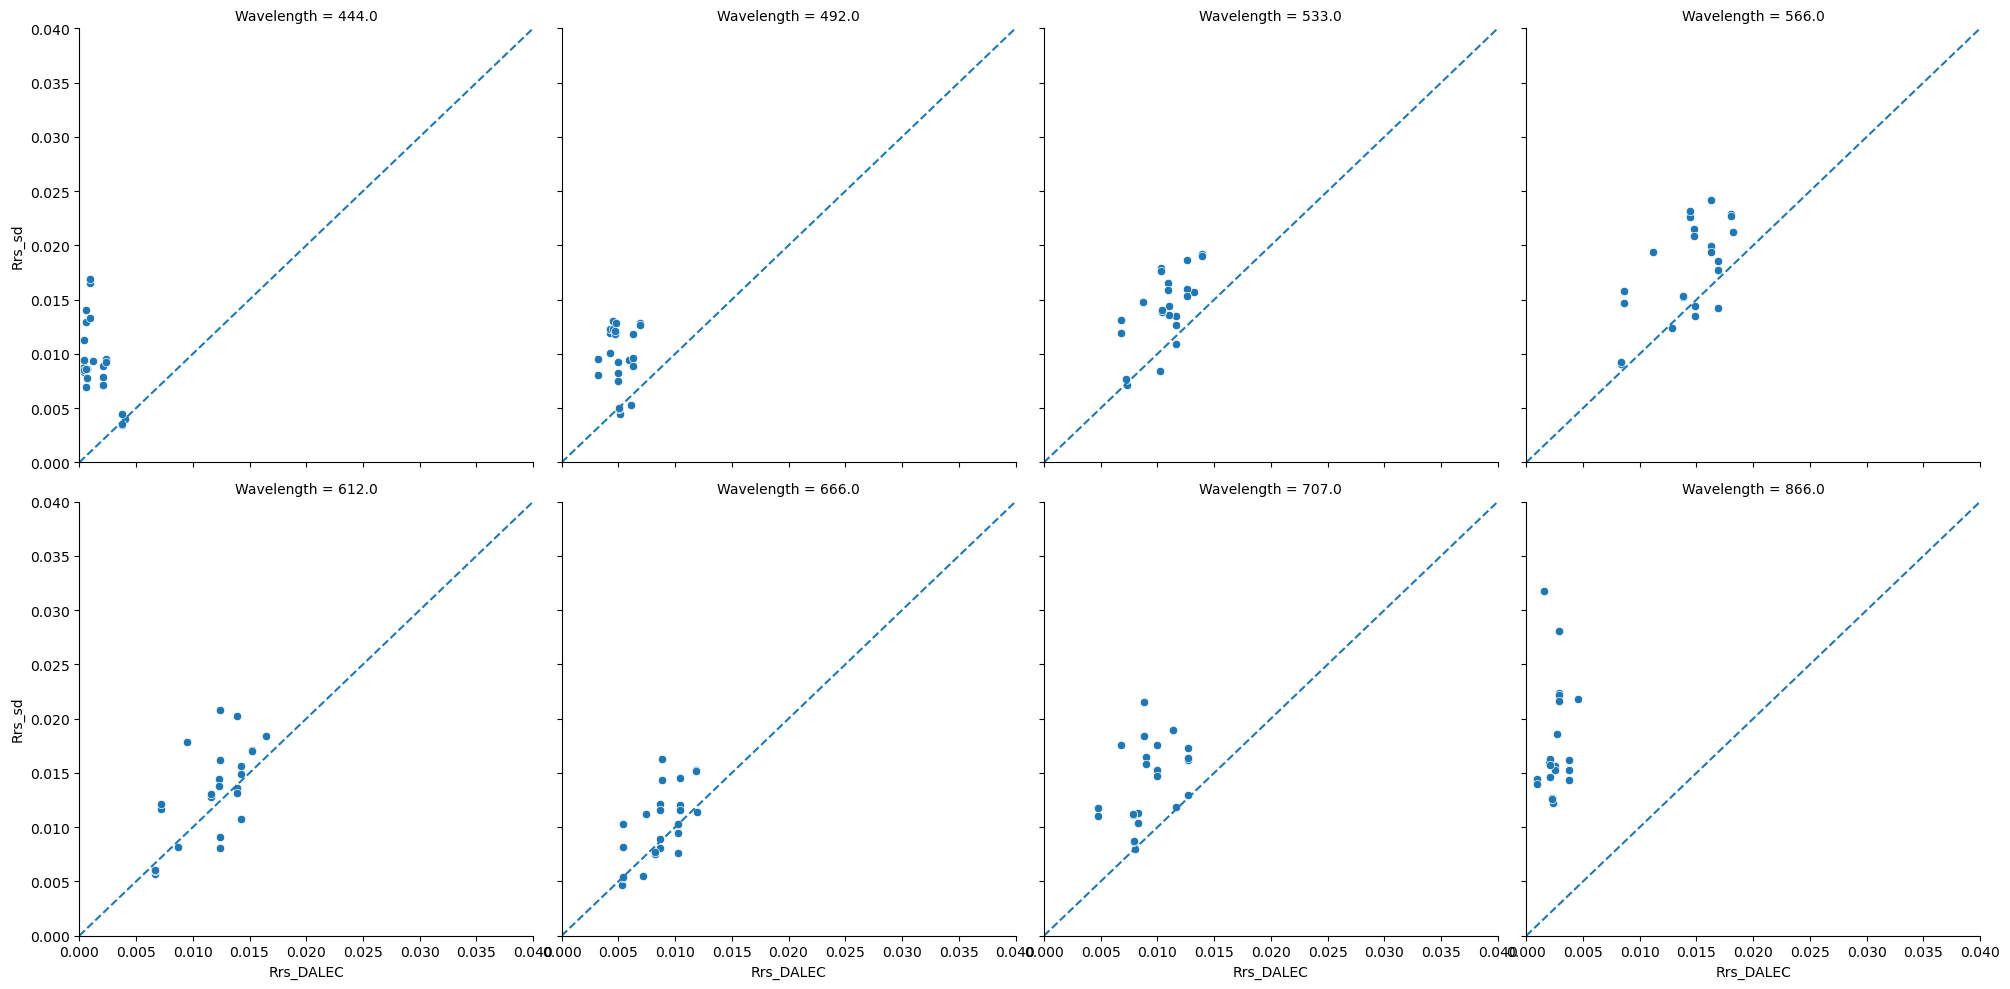

In [20]:
g = sns.relplot(data=dalec_sd, x='Rrs_DALEC', y='Rrs_sd', col='Wavelength', col_wrap=4)
g.set(ylim=(0, 0.04), xlim=(0, 0.04))

for ax in g.axes.flat:
    ax.plot([0, 0.04], [0, 0.04], '--')

In [21]:
dalec_med.date.unique()

<DatetimeArray>
['2022-07-28 00:00:00', '2022-07-31 00:00:00', '2022-08-01 00:00:00',
 '2022-08-02 00:00:00', '2022-08-03 00:00:00', '2022-08-05 00:00:00',
 '2022-08-06 00:00:00', '2022-08-07 00:00:00', '2022-08-08 00:00:00',
 '2022-08-09 00:00:00', '2022-08-10 00:00:00', '2022-08-11 00:00:00',
 '2022-08-12 00:00:00', '2022-08-13 00:00:00', '2022-08-14 00:00:00',
 '2022-08-15 00:00:00', '2023-07-08 00:00:00', '2023-07-09 00:00:00',
 '2023-07-10 00:00:00', '2023-07-11 00:00:00', '2023-07-12 00:00:00',
 '2023-07-13 00:00:00', '2023-07-14 00:00:00', '2023-07-15 00:00:00',
 '2023-07-16 00:00:00', '2023-07-17 00:00:00', '2023-07-18 00:00:00',
 '2023-07-19 00:00:00', '2023-07-20 00:00:00', '2023-07-21 00:00:00',
 '2023-07-22 00:00:00', '2023-07-23 00:00:00', '2023-07-24 00:00:00',
 '2023-07-25 00:00:00', '2023-07-26 00:00:00', '2023-07-27 00:00:00',
 '2023-07-28 00:00:00', '2023-07-29 00:00:00', '2023-07-30 00:00:00',
 '2023-07-31 00:00:00', '2023-08-01 00:00:00', '2023-08-02 00:00:00',
 '20

In [22]:
sds_med.date.unique()

<DatetimeArray>
['2022-04-19 00:00:00', '2022-04-23 00:00:00', '2022-04-24 00:00:00',
 '2022-04-29 00:00:00', '2022-05-24 00:00:00', '2022-06-04 00:00:00',
 '2022-06-05 00:00:00', '2022-06-18 00:00:00', '2022-06-20 00:00:00',
 '2022-07-04 00:00:00', '2022-07-07 00:00:00', '2022-07-10 00:00:00',
 '2022-08-10 00:00:00', '2022-08-11 00:00:00', '2022-08-13 00:00:00',
 '2022-08-17 00:00:00', '2022-08-20 00:00:00', '2022-08-27 00:00:00',
 '2022-09-10 00:00:00', '2022-09-12 00:00:00', '2022-09-13 00:00:00',
 '2022-09-14 00:00:00', '2022-09-15 00:00:00', '2022-09-20 00:00:00',
 '2022-09-24 00:00:00', '2023-04-03 00:00:00', '2023-04-07 00:00:00',
 '2023-04-08 00:00:00', '2023-04-14 00:00:00', '2023-04-15 00:00:00',
 '2023-04-18 00:00:00', '2023-04-19 00:00:00', '2023-04-20 00:00:00',
 '2023-04-21 00:00:00', '2023-04-22 00:00:00', '2023-05-07 00:00:00',
 '2023-05-16 00:00:00', '2023-05-22 00:00:00', '2023-05-25 00:00:00',
 '2023-05-26 00:00:00', '2023-05-29 00:00:00', '2023-05-30 00:00:00',
 '20

In [23]:
sds_med.date.unique()[sds_med.date.unique().isin(dalec_med.date.unique())]

<DatetimeArray>
['2022-08-10 00:00:00', '2022-08-11 00:00:00', '2022-08-13 00:00:00',
 '2023-07-08 00:00:00', '2023-07-12 00:00:00', '2023-07-21 00:00:00',
 '2023-08-26 00:00:00', '2023-08-31 00:00:00', '2023-09-01 00:00:00',
 '2023-09-07 00:00:00', '2023-09-08 00:00:00', '2023-09-11 00:00:00',
 '2023-09-12 00:00:00']
Length: 13, dtype: datetime64[ns]

In [24]:
# if I allow +- 2 days for match ups then I can match:

# sd: 2023-10-01 with dalec: 2023-09-30
# sd: 2022-08-17 with dalec: 2022-08-15
# sd: 2023-09-03 with dalec: 2023-09-01

# easiest way to do this is to manually change the date

In [25]:
sd_med_alt = sds_med.copy()

sd_med_alt['original_date'] = 'nan'
sd_med_alt['date_flag'] = 0

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'original_date'] = '2023-10-01'
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'original_date'] = '2023-08-17'
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'original_date'] = '2023-09-03'

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'date_flag'] = 1
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'date_flag'] = 1
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'date_flag'] = 1

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'date'] = pd.to_datetime('2023-09-30')
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'date'] = pd.to_datetime('2023-08-15')
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'date'] = pd.to_datetime('2023-09-01')


In [26]:
dalec_sd_alt = dalec_med.merge(sd_med_alt, on=['date', 'Wavelength'], how='left').dropna()
dalec_sd_alt.date.unique()

<DatetimeArray>
['2022-08-10 00:00:00', '2022-08-11 00:00:00', '2022-08-13 00:00:00',
 '2023-07-08 00:00:00', '2023-07-12 00:00:00', '2023-07-21 00:00:00',
 '2023-08-15 00:00:00', '2023-08-26 00:00:00', '2023-08-31 00:00:00',
 '2023-09-01 00:00:00', '2023-09-07 00:00:00', '2023-09-08 00:00:00',
 '2023-09-11 00:00:00', '2023-09-12 00:00:00', '2023-09-30 00:00:00']
Length: 15, dtype: datetime64[ns]

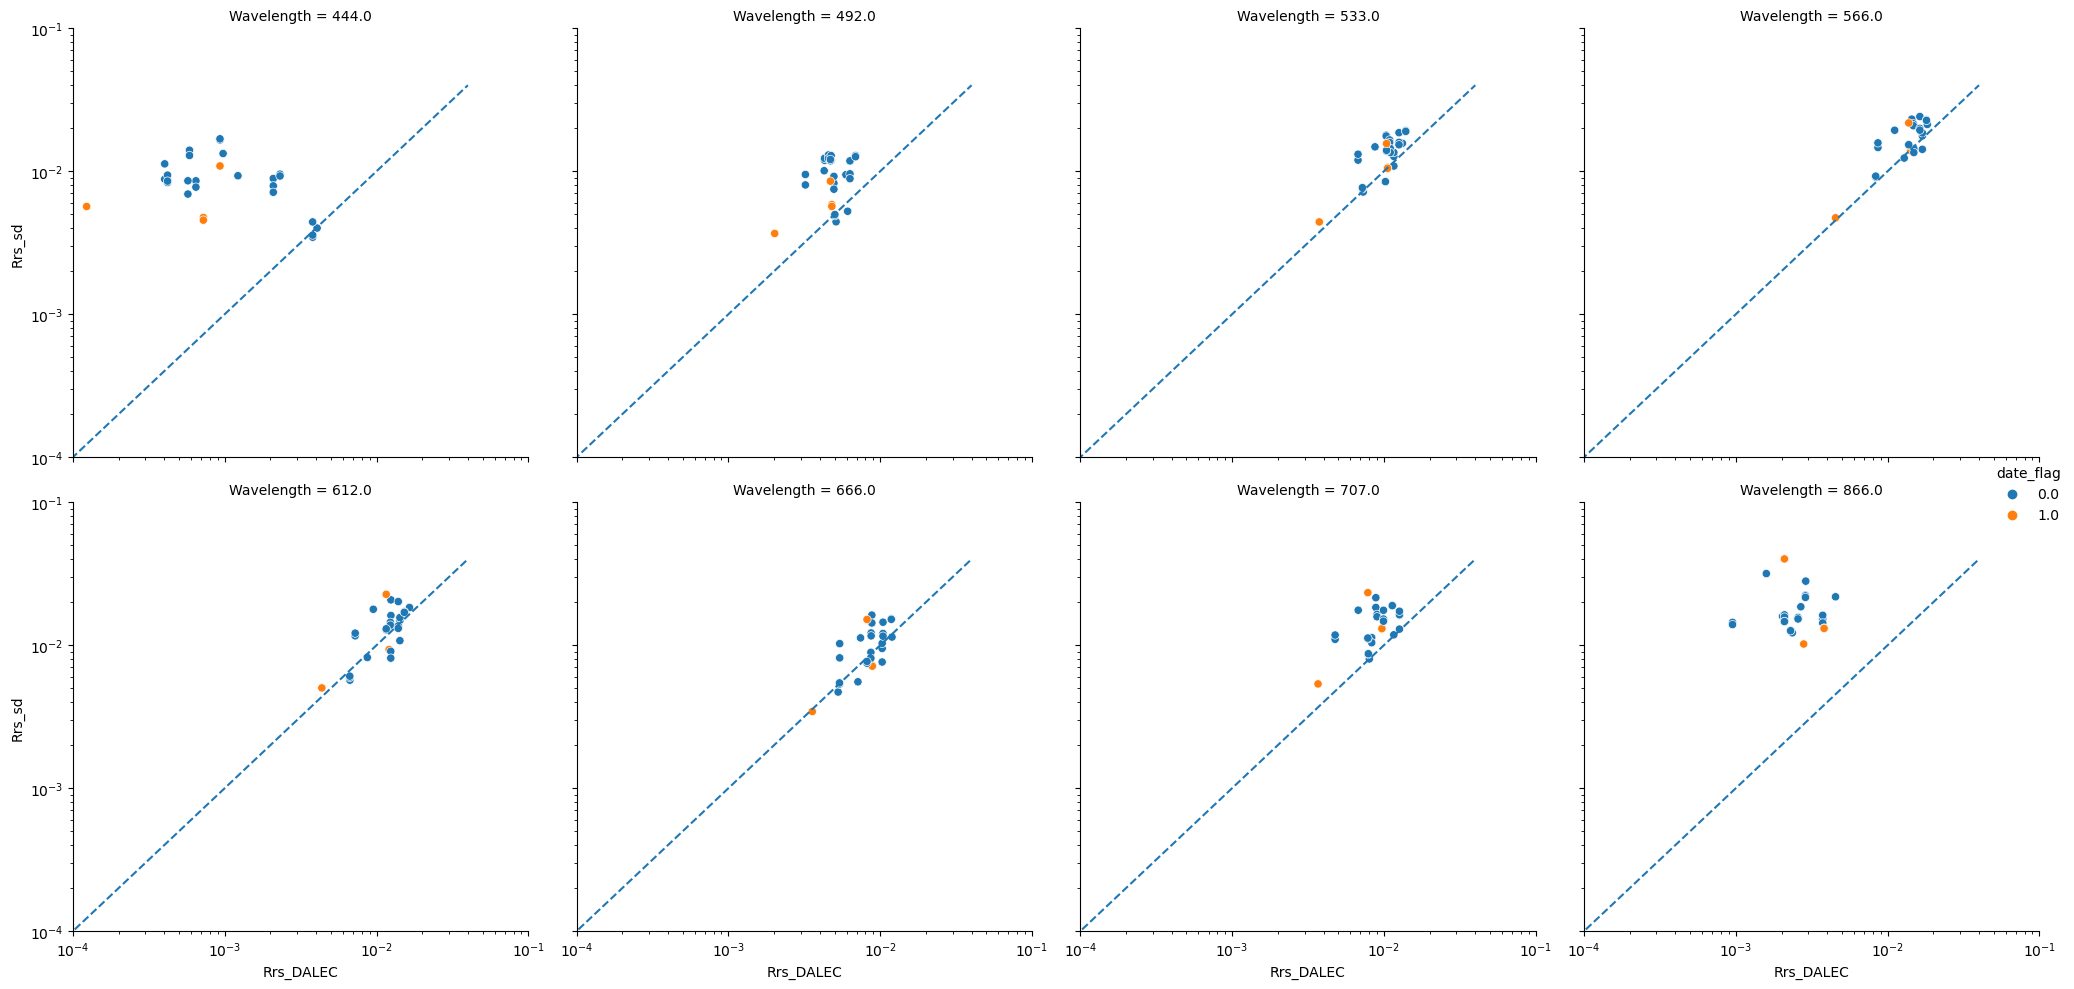

In [27]:
g = sns.relplot(data=dalec_sd_alt, x='Rrs_DALEC', y='Rrs_sd', col='Wavelength', col_wrap=4, hue='date_flag')
g.set(xscale="log")
g.set(yscale="log")
g.set(ylim=(0.0001, 0.1), xlim=(0.0001, 0.1))
#g.set(ylim=(0, 0.04), xlim=(0, 0.04))


for ax in g.axes.flat:
    ax.plot([0, 0.04], [0, 0.04], '--')

plt.tight_layout()

In [28]:
dalec_sd_alt.Date.unique()

<DatetimeArray>
['2022-08-10 10:27:06+00:00', '2022-08-11 10:28:21+00:00',
 '2022-08-11 10:28:23+00:00', '2022-08-13 11:13:41+00:00',
 '2023-07-08 10:29:51+00:00', '2023-07-12 10:31:47+00:00',
 '2023-07-12 11:05:26+00:00', '2023-07-21 10:34:37+00:00',
 '2023-07-21 10:34:40+00:00', '2023-07-21 10:35:46+00:00',
 '2022-08-17 11:03:56+00:00', '2022-08-17 11:03:58+00:00',
 '2023-08-26 11:06:47+00:00', '2023-08-26 11:06:49+00:00',
 '2023-08-31 11:11:37+00:00', '2023-08-31 11:11:40+00:00',
 '2023-09-01 10:25:01+00:00', '2023-09-01 10:25:03+00:00',
 '2023-09-03 10:36:33+00:00', '2023-09-07 10:30:39+00:00',
 '2023-09-07 11:11:44+00:00', '2023-09-07 11:11:46+00:00',
 '2023-09-08 11:10:06+00:00', '2023-09-08 11:10:08+00:00',
 '2023-09-11 10:30:46+00:00', '2023-09-12 10:32:01+00:00',
 '2023-09-12 11:11:16+00:00', '2023-10-01 11:10:51+00:00']
Length: 28, dtype: datetime64[ns, UTC]

In [29]:
dalec_sd_alt[dalec_sd_alt.date.dt.year==2023].Date.unique()

<DatetimeArray>
['2023-07-08 10:29:51+00:00', '2023-07-12 10:31:47+00:00',
 '2023-07-12 11:05:26+00:00', '2023-07-21 10:34:37+00:00',
 '2023-07-21 10:34:40+00:00', '2023-07-21 10:35:46+00:00',
 '2022-08-17 11:03:56+00:00', '2022-08-17 11:03:58+00:00',
 '2023-08-26 11:06:47+00:00', '2023-08-26 11:06:49+00:00',
 '2023-08-31 11:11:37+00:00', '2023-08-31 11:11:40+00:00',
 '2023-09-01 10:25:01+00:00', '2023-09-01 10:25:03+00:00',
 '2023-09-03 10:36:33+00:00', '2023-09-07 10:30:39+00:00',
 '2023-09-07 11:11:44+00:00', '2023-09-07 11:11:46+00:00',
 '2023-09-08 11:10:06+00:00', '2023-09-08 11:10:08+00:00',
 '2023-09-11 10:30:46+00:00', '2023-09-12 10:32:01+00:00',
 '2023-09-12 11:11:16+00:00', '2023-10-01 11:10:51+00:00']
Length: 24, dtype: datetime64[ns, UTC]

In [30]:
dalec_sd_alt['year'] = dalec_sd_alt.date.dt.year

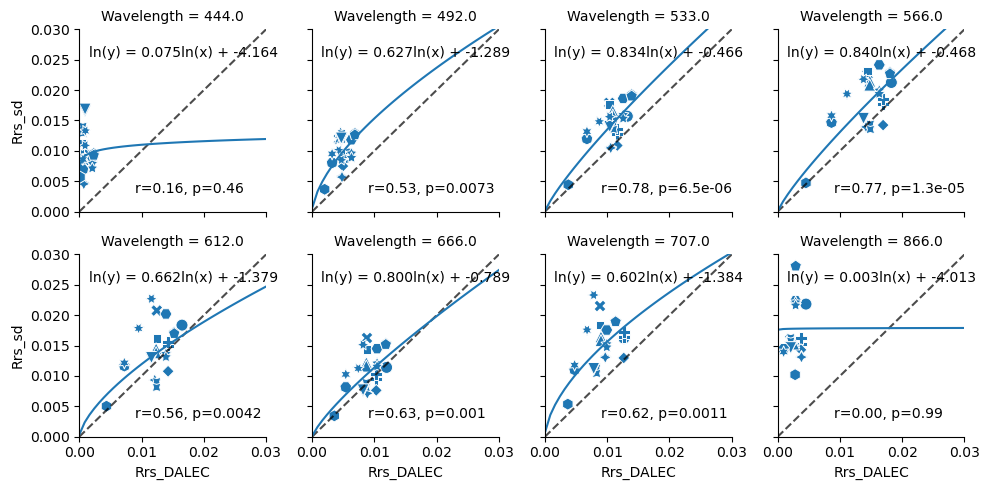

In [31]:
g = sns.FacetGrid(dalec_sd_alt[dalec_sd_alt.year == 2023], col='Wavelength', col_wrap=4, height=2.5)
#g.map_dataframe(sns.regplot, x='Rrs_DALEC', y='Rrs_sd')

#g = sns.lmplot(data=dalec_sd_alt, x='Rrs_DALEC', y='Rrs_sd', col='Wavelength',
#               col_wrap=4, order=1, fit_reg=False, height=3)
#g.set(ylim=(0.0001, 0.1), xlim=(0.0001, 0.1))

g.set(ylim=(0, 0.03), xlim=(0, 0.03))

g.map_dataframe(sns.scatterplot, x='Rrs_DALEC', y='Rrs_sd',
                style='Sat_ID',
                #hue='year',
                legend=True,
                #style='date',
                s=75)

for ax in g.axes.flat:
    ax.plot([0, 0.03], [0, 0.03], 'k--', alpha=0.7)
    
def annotate(data, **kws):
    res = sp.stats.linregress(np.log(data['Rrs_DALEC']), np.log(data['Rrs_sd']))
    #res = sp.stats.linregress((data['Rrs_DALEC']), (data['Rrs_sd']))

    ax = plt.gca()
    ax.text(0.3, 0.1, 'r={:.2f}, p={:.2g}'.format(res.rvalue, res.pvalue),
            transform=ax.transAxes)
    x_vals = np.linspace(0.0001, 0.03, 40)
    ax.plot(x_vals,
            np.exp(res.intercept + res.slope*np.log(x_vals)))
             
    ax.text(0.05, 0.85, 'ln(y) = {:.3f}ln(x) + {:.3f}'.format(res.slope, res.intercept),
            transform=ax.transAxes)
    
#    y_fit = data['Rrs_DALEC']*res.slope + res.intercept
#     MAE = np.sum(np.abs(y_fit - data['Rrs_DALEC']))/len(data['Rrs_DALEC'])
#     ax.text(0.05, 0.8, 'MAE={:.2g}'.format(MAE),
#             transform=ax.transAxes)
    
g.map_dataframe(annotate)

# g.set(xscale="log")
# g.set(yscale="log")

#g.set(ylim=(0.0001, 0.1), xlim=(0.0001, 0.1))


plt.tight_layout()
#plt.gca().legend()

plt.show()




In [32]:
# res_666 = sp.stats.linregress(np.log(dalec_sd_alt[dalec_sd_alt.Wavelength==666.0]['Rrs_DALEC']),
#                           np.log(dalec_sd_alt[dalec_sd_alt.Wavelength==666.0]['Rrs_sd'])
#                          )
# res_707 = sp.stats.linregress(np.log(dalec_sd_alt[dalec_sd_alt.Wavelength==707.0]['Rrs_DALEC']),
#                           np.log(dalec_sd_alt[dalec_sd_alt.Wavelength==707.0]['Rrs_sd'])
#                          )

# only 2023

res_666 = sp.stats.linregress(np.log(dalec_sd_alt[(dalec_sd_alt.Wavelength==666.) & (dalec_sd_alt.date.dt.year==2023)]['Rrs_DALEC']),
                          np.log(dalec_sd_alt[(dalec_sd_alt.Wavelength==666.) & (dalec_sd_alt.date.dt.year==2023)]['Rrs_sd'])
                         )
res_707 = sp.stats.linregress(np.log(dalec_sd_alt[(dalec_sd_alt.Wavelength==707.) & (dalec_sd_alt.date.dt.year==2023)]['Rrs_DALEC']),
                          np.log(dalec_sd_alt[(dalec_sd_alt.Wavelength==707.) & (dalec_sd_alt.date.dt.year==2023)]['Rrs_sd'])
                         )

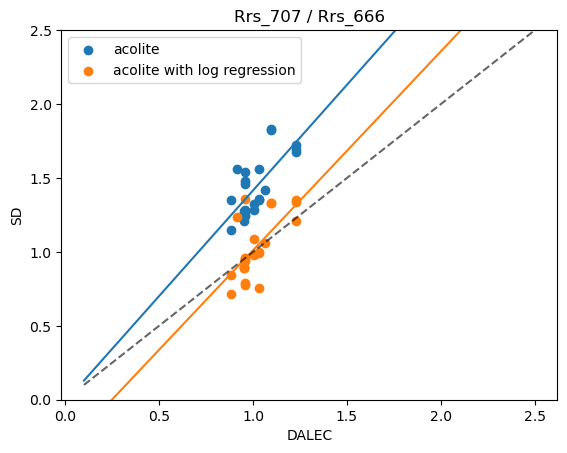

In [33]:
dalec_707 = dalec_sd_alt[(dalec_sd_alt.Wavelength==707.) & (dalec_sd_alt.date.dt.year==2023)].Rrs_DALEC.values
dalec_666 = dalec_sd_alt[(dalec_sd_alt.Wavelength==666.) & (dalec_sd_alt.date.dt.year==2023)].Rrs_DALEC.values
sd_707 = dalec_sd_alt[(dalec_sd_alt.Wavelength==707.) & (dalec_sd_alt.date.dt.year==2023)].Rrs_sd.values
sd_666 = dalec_sd_alt[(dalec_sd_alt.Wavelength==666.) & (dalec_sd_alt.date.dt.year==2023)].Rrs_sd.values

sd_707_f = np.exp((np.log(sd_707) - res_707.intercept)/res_707.slope)
sd_666_f = np.exp((np.log(sd_666) - res_666.intercept)/res_666.slope)

dalec_ratio = dalec_707/dalec_666
sd_ratio = sd_707/sd_666
sd_f_ratio = sd_707_f/sd_666_f

plt.scatter(dalec_ratio, sd_ratio, label='acolite')
res_1 = sp.stats.linregress(dalec_ratio, sd_ratio)
plt.plot([0.1, 2.5], res_1.intercept + np.array([0.1, 2.5])*res_1.slope)
plt.scatter(dalec_ratio, sd_f_ratio, label='acolite with log regression')
res_2 = sp.stats.linregress(dalec_ratio, sd_f_ratio)
plt.plot([0.1, 2.5], res_2.intercept + np.array([0.1, 2.5])*res_2.slope)

plt.plot([0.1, 2.5], [0.1, 2.5], 'k--', alpha=0.6)
plt.title('Rrs_707 / Rrs_666')
plt.xlabel('DALEC')
plt.ylabel('SD')
plt.ylim(0., 2.5)
plt.legend()
plt.show()

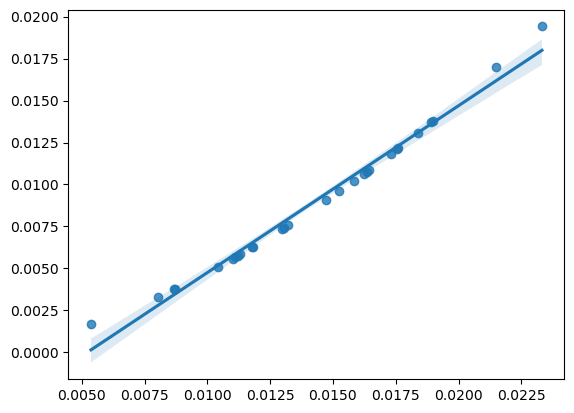

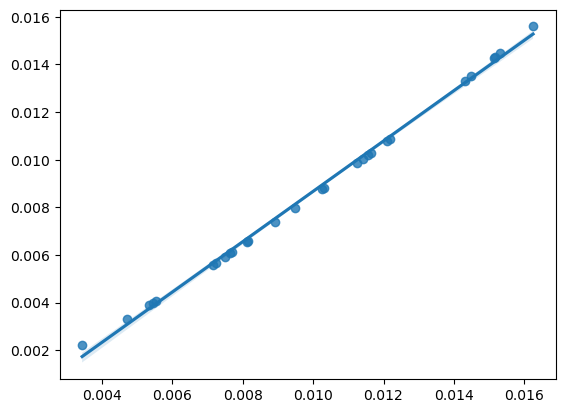

In [34]:
dalec_707 = dalec_sd_alt[(dalec_sd_alt.Wavelength==707.)].Rrs_DALEC.values
dalec_666 = dalec_sd_alt[(dalec_sd_alt.Wavelength==666.)].Rrs_DALEC.values
sd_707 = dalec_sd_alt[(dalec_sd_alt.Wavelength==707.)].Rrs_sd.values
sd_666 = dalec_sd_alt[(dalec_sd_alt.Wavelength==666.)].Rrs_sd.values

sd_707_f = np.exp((np.log(sd_707) - res_707.intercept)/res_707.slope)
sd_666_f = np.exp((np.log(sd_666) - res_666.intercept)/res_666.slope)

sns.regplot(x=sd_707, y=sd_707_f)
#sns.regplot(x=dalec_707, y=sd_707)
#plt.plot([0.005, 0.015], [0.005, 0.015], 'k--', alpha=0.5)
plt.show()

sns.regplot(x=sd_666, y=sd_666_f)
#sns.regplot(x=dalec_666, y=sd_666)
#plt.plot([0.005, 0.015], [0.005, 0.015], 'k--', alpha=0.5)
plt.show()

# Interesting stuff here:

- if I exclude 2022 from the match up data, we find that the sd 707/666 ratio correlates well with the DALEC ratio , but with a steeper slope
    - we see this also in the chl-a analysis (DALEC vs insitu chl-a has too shallow a slope, whereas slope of SD data is closer to 1:1)
- the 3 points from 2022 appear to not fit with the rest of the data - this checks out with what I see when I use the DALEC data to estimate chl-a
- Probably should completely exclude 2022 from the analysis
- might then run into an issue that I don't have very many DALEC-SD match ups 
- the log regression seemed really important for making the SD data make sense with the chl-a data, so I think I need to understand why this is needed, and justify it some more
    - 

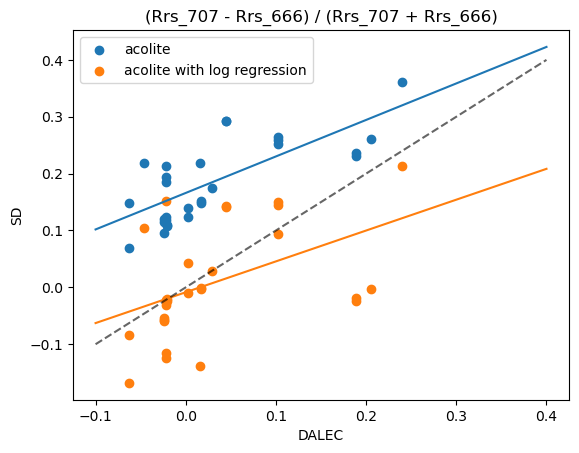

In [35]:
dalec_diff_ratio = (dalec_707 - dalec_666)/(dalec_707 + dalec_666)
sd_diff_ratio = (sd_707 - sd_666)/(sd_707 + sd_666)
sd_f_diff_ratio = (sd_707_f - sd_666_f)/(sd_707_f + sd_666_f)

plt.scatter(dalec_diff_ratio, sd_diff_ratio, label='acolite')
res_1 = sp.stats.linregress(dalec_diff_ratio, sd_diff_ratio)
plt.plot([-0.1, 0.4], res_1.intercept + np.array([-0.1, 0.4])*res_1.slope)
plt.scatter(dalec_diff_ratio, sd_f_diff_ratio, label='acolite with log regression')
res_2 = sp.stats.linregress(dalec_diff_ratio, sd_f_diff_ratio)
plt.plot([-0.1, 0.4], res_2.intercept + np.array([-0.1, 0.4])*res_2.slope)
plt.plot([-0.1, 0.4], [-0.1, 0.4], 'k--', alpha=0.6)
plt.title('(Rrs_707 - Rrs_666) / (Rrs_707 + Rrs_666)')
plt.xlabel('DALEC')
plt.ylabel('SD')
#plt.ylim(-0.1, 0.4)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Rrs_707/Rrs_666 (2022, 2023)')

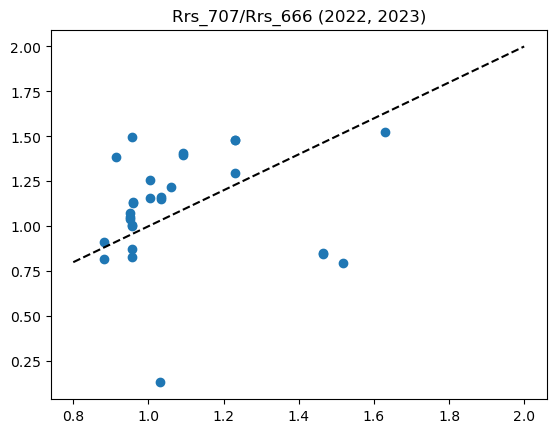

In [36]:

dalec_ratio = dalec_sd_alt[dalec_sd_alt.Wavelength==707.].Rrs_DALEC.values/dalec_sd_alt[dalec_sd_alt.Wavelength==666.].Rrs_DALEC.values
sd_ratio = ((dalec_sd_alt[dalec_sd_alt.Wavelength==707.].Rrs_sd.values - 0.005)/0.971)/((dalec_sd_alt[dalec_sd_alt.Wavelength==666.].Rrs_sd.values)/(1.203))

plt.scatter(dalec_ratio, sd_ratio)
plt.plot([0.8, 2], [0.8, 2], 'k--')
plt.title('Rrs_707/Rrs_666 (2022, 2023)')



# sds_melt.Date.dt.hour.unique()

# only look at DALEC data from between 10-12 in the morning (ie. to match sd overpass time approx)

In [37]:
dalec_morn = pd.read_csv('DALEC_SD_bands_2022_23.csv')
dalec_morn.drop(['Unnamed: 0', 'month', 'year'], axis=1, inplace=True)
dalec_morn.rename(columns={'Rrs':'Rrs_DALEC', 'wavelength':'Wavelength'}, inplace=True)
dalec_morn['Date'] = pd.to_datetime(dalec_morn.Date)
dalec_morn = dalec_morn[dalec_morn.Date.dt.hour.isin([10, 11])]
dalec_morn.drop(['Date'], inplace=True, axis=1)
dalec_morn = dalec_morn.groupby(['Wavelength', 'date']).median().reset_index()
dalec_morn['date'] = pd.to_datetime(dalec_morn.date)
dalec_morn

,Wavelength,date,Rrs_DALEC
0,444.0,2022-07-28,0.003432
1,444.0,2022-07-31,0.003935
2,444.0,2022-08-01,0.003738
3,444.0,2022-08-02,0.003542
4,444.0,2022-08-03,0.002927
...,...,...,...
755,866.0,2023-09-25,0.001589
756,866.0,2023-09-26,0.004387
757,866.0,2023-09-27,0.002829
758,866.0,2023-09-28,0.002302


In [38]:
# NEED TO DO THIS AGAIN, because we lose one matching date

sd_med_alt = sds_med.copy()

sd_med_alt['original_date'] = 'nan'
sd_med_alt['date_flag'] = 0

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'original_date'] = '2023-10-01'
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'original_date'] = '2023-08-17'
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'original_date'] = '2023-09-03'

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'date_flag'] = 1
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'date_flag'] = 1
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'date_flag'] = 1

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'date'] = pd.to_datetime('2023-09-29') # this is 29th not 30th now!
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'date'] = pd.to_datetime('2023-08-15')
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'date'] = pd.to_datetime('2023-09-01')

In [39]:
dalec_morn_sd_alt = dalec_morn.merge(sd_med_alt, on=['date', 'Wavelength'], how='left').dropna()
dalec_morn_sd_alt.date.unique()

<DatetimeArray>
['2022-08-10 00:00:00', '2022-08-11 00:00:00', '2022-08-13 00:00:00',
 '2023-07-08 00:00:00', '2023-07-12 00:00:00', '2023-07-21 00:00:00',
 '2023-08-15 00:00:00', '2023-08-26 00:00:00', '2023-08-31 00:00:00',
 '2023-09-01 00:00:00', '2023-09-07 00:00:00', '2023-09-08 00:00:00',
 '2023-09-11 00:00:00', '2023-09-12 00:00:00', '2023-09-29 00:00:00']
Length: 15, dtype: datetime64[ns]

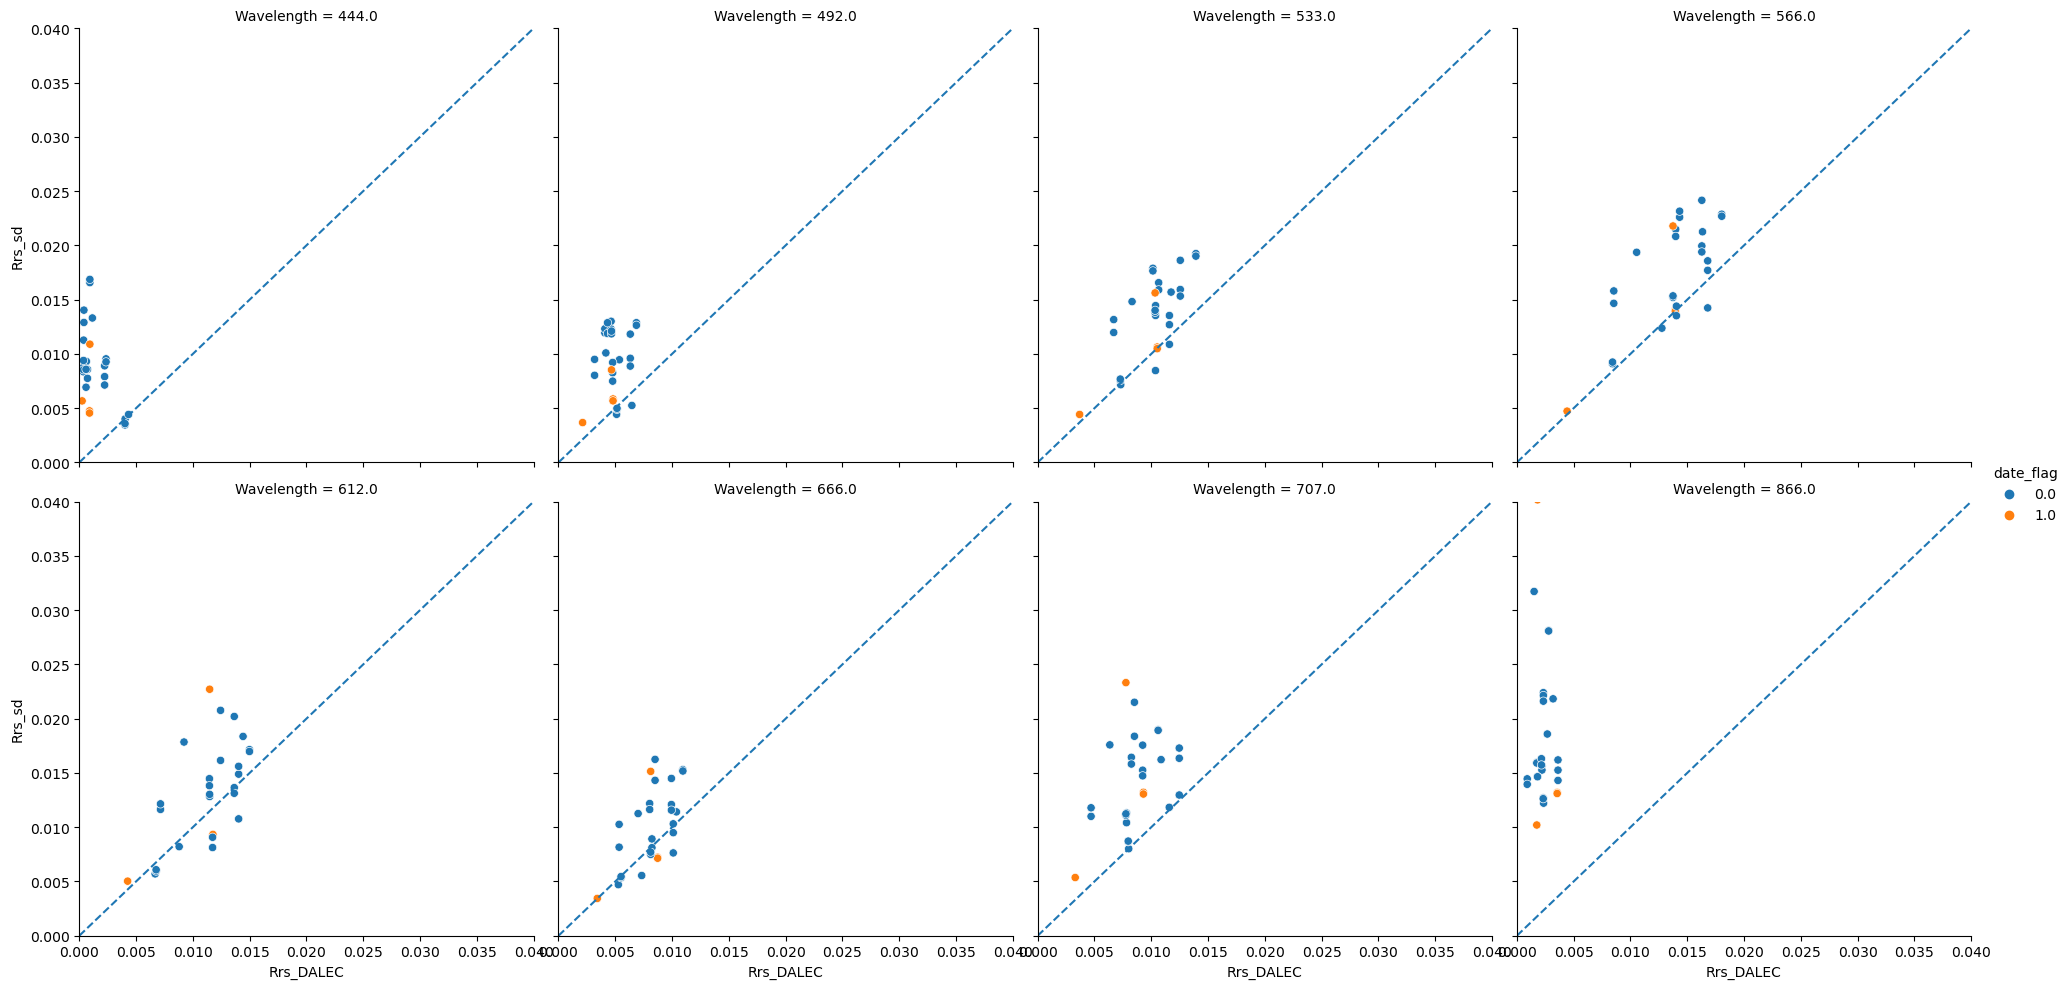

In [40]:
g = sns.relplot(data=dalec_morn_sd_alt, x='Rrs_DALEC', y='Rrs_sd', col='Wavelength', col_wrap=4, hue='date_flag')
g.set(ylim=(0, 0.04), xlim=(0, 0.04))

for ax in g.axes.flat:
    ax.plot([0, 0.04], [0, 0.04], '--')

### ^^ only using these hours really makes very little difference

# Try a chl-a alg

Going to use model C from https://www.sciencedirect.com/science/article/pii/S0034425719301786#s0010



In [96]:
def chla_gurlin2011(df, a=86.09, b=-517.5, c=886):
    ratio = df['Rrs_708'] / df['Rrs_666']
    return (a*(ratio**2)) + (b*ratio) + c

def chla_model_A(df, a=80.7, b=53.18):
    return a * (df['Rrs_708'] / df['Rrs_666']) + b

def chla_model_J(df, a=19.31, b=153.5, c=105.4,
                 m707=1.0, c707=0.0,
                 m666=1.0, c666=0.0):
    # use m and c to adjust 707 and 666 based on regression coeffs from dalec sd comparison
    R707 = np.exp((np.log(df['Rrs_708']) - c707)/m707)
    R666 = np.exp((np.log(df['Rrs_666']) - c666)/m666)
    ratio = (R707 - R666)/(R707 + R666)
    return a + (b*ratio) + (c*(ratio**2))
 
sd_chla = pd.DataFrame(data={'Date':sds_med[sds_med.Wavelength==707.0].reset_index().Date,
                              'date':sds_med[sds_med.Wavelength==707.0].reset_index().date, 
                              'Rrs_708':sds_med[sds_med.Wavelength==707.0].reset_index().Rrs_sd,
                              'Rrs_666':sds_med[sds_med.Wavelength==666.0].reset_index().Rrs_sd  })

sd_chla['chl-a_gurlin'] = chla_gurlin2011(sd_chla)
sd_chla['chl-a_A'] = chla_model_A(sd_chla)
sd_chla['chl-a_J'] = chla_model_J(sd_chla)
sd_chla['chl-a_J_cal'] = chla_model_J(sd_chla, a=18.44, b=149.2, c=347.9,
                                      m707=res_707.slope, c707=res_707.intercept,
                                      m666=res_666.slope, c666=res_666.intercept)
sd_chla['chl-a_K_org'] = chla_model_J(sd_chla, a=14.039, b=86.115, c=194.33)

sd_chla

dalec_chla = pd.DataFrame(data={
                              'date':dalec_med[dalec_med.Wavelength==707.0].reset_index().date, 
                              'Rrs_708':dalec_med[dalec_med.Wavelength==707.0].reset_index().Rrs_DALEC,
                              'Rrs_666':dalec_med[dalec_med.Wavelength==666.0].reset_index().Rrs_DALEC  })

dalec_chla['chl-a_gurlin'] = chla_gurlin2011(dalec_chla)
dalec_chla['chl-a_A'] = chla_model_A(dalec_chla)
dalec_chla['chl-a_J'] = chla_model_J(dalec_chla)
dalec_chla['chl-a_J_cal'] = chla_model_J(dalec_chla, a=18.44, b=149.2, c=347.9)
dalec_chla['chl-a_J_cal_COR'] = chla_model_J(dalec_chla, a=18.44, b=149.2, c=347.9,
                                             m707=res_707.slope, c707=res_707.intercept,
                                             m666=res_666.slope, c666=res_666.intercept)
dalec_chla['chl-a_K_org'] = chla_model_J(dalec_chla, a=14.039, b=86.115, c=194.33)



dalec_chla

,date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_J_cal_COR,chl-a_K_org
0,2022-07-28,0.006881,0.005111,345.352535,161.820021,44.256417,48.032450,2.877338,30.978225
1,2022-07-31,0.008219,0.005539,307.642067,172.932686,53.215789,60.712332,8.402087,38.192086
2,2022-08-01,0.007481,0.005256,323.850173,168.037859,49.337332,55.114736,5.016023,35.009457
3,2022-08-02,0.007381,0.004886,300.679656,175.096293,54.896474,63.186385,7.458227,39.597900
4,2022-08-03,0.006902,0.004405,286.552367,179.610246,58.337357,68.338391,8.225084,42.523879
...,...,...,...,...,...,...,...,...,...
91,2023-09-26,0.005212,0.004990,439.400365,137.469566,22.699486,21.850718,11.647726,16.004530
92,2023-09-27,0.004661,0.004372,432.093617,139.225599,24.339290,23.580666,12.642980,16.999431
93,2023-09-28,0.003415,0.003499,462.897557,131.950061,17.467749,16.685306,27.373055,13.025281
94,2023-09-29,0.002448,0.002607,476.079244,128.933628,14.562360,14.070697,41.643229,11.510666


<Axes: xlabel='Date', ylabel='chl-a_J'>

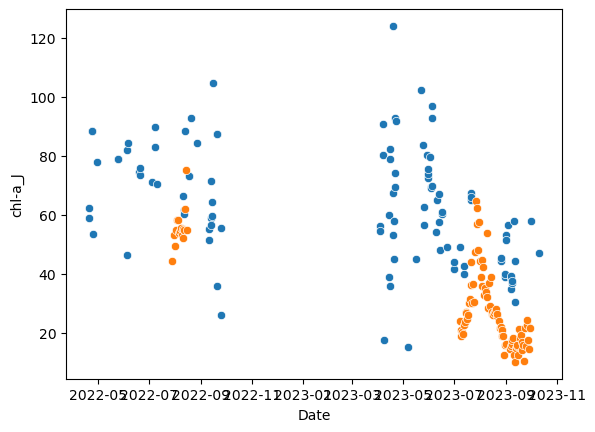

In [97]:
sns.scatterplot(data=sd_chla, x='Date', y='chl-a_J')
sns.scatterplot(data=dalec_chla, x='date', y='chl-a_J')


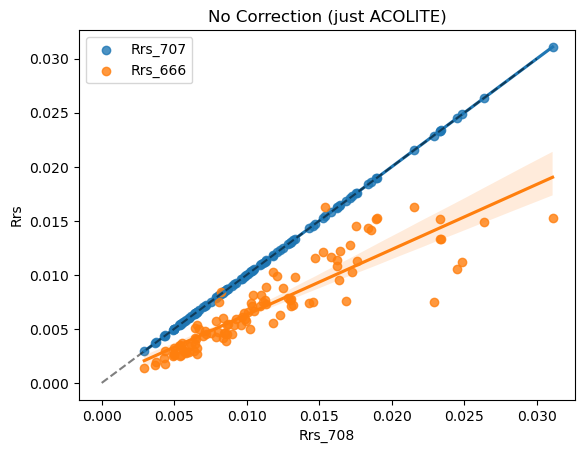

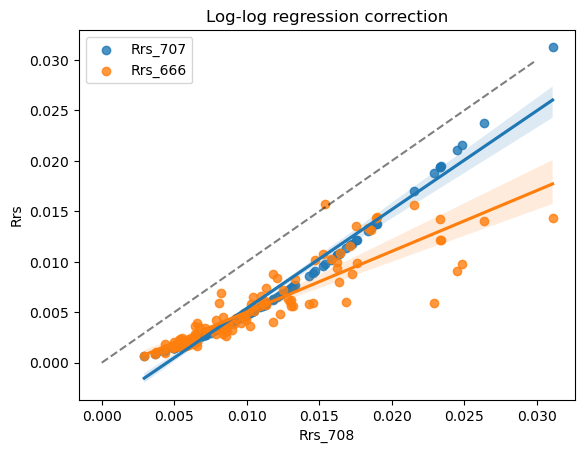

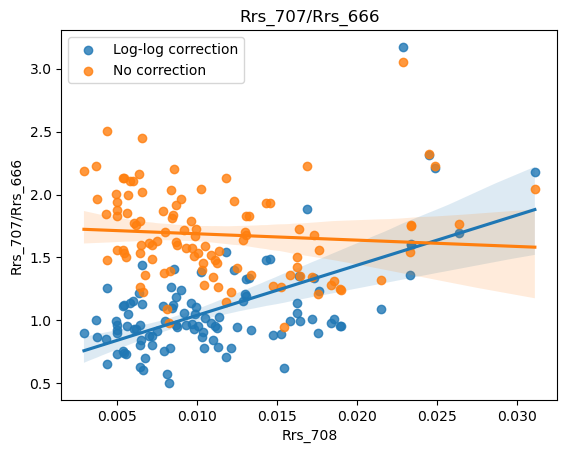

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


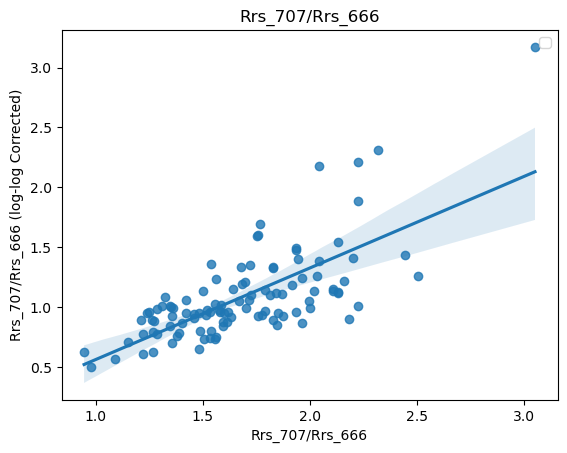

In [98]:
sd_707 = sd_chla.Rrs_708
sd_666 = sd_chla.Rrs_666
sd_707_f = np.exp((np.log(sd_707) - res_707.intercept)/res_707.slope)
sd_666_f = np.exp((np.log(sd_666) - res_666.intercept)/res_666.slope)


sns.regplot(x=sd_707, y=sd_707, label='Rrs_707')
sns.regplot(x=sd_707, y=sd_666, label='Rrs_666')
plt.title('No Correction (just ACOLITE)')
plt.legend()
plt.ylabel('Rrs')
plt.plot([0, 0.03], [0, 0.03], 'k--', alpha=0.5)
plt.show()
sns.regplot(x=sd_707, y=sd_707_f, label='Rrs_707')
sns.regplot(x=sd_707, y=sd_666_f, label='Rrs_666')
plt.title('Log-log regression correction')
plt.legend()
plt.ylabel('Rrs')
plt.plot([0, 0.03], [0, 0.03], 'k--', alpha=0.5)
plt.show()
sns.regplot(x=sd_707, y=sd_707_f/sd_666_f, label='Log-log correction')
sns.regplot(x=sd_707, y=sd_707/sd_666, label='No correction')
plt.title('Rrs_707/Rrs_666')
plt.ylabel('Rrs_707/Rrs_666')

plt.legend()
plt.show()

sns.regplot(x=sd_707/sd_666, y=sd_707_f/sd_666_f)
plt.title('Rrs_707/Rrs_666')
plt.ylabel('Rrs_707/Rrs_666 (log-log Corrected)')
plt.xlabel('Rrs_707/Rrs_666')

plt.legend()
plt.show()

In [99]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(dalec_chla)


,date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_J_cal_COR,chl-a_K_org
0,2022-07-28,0.007,0.005,345.353,161.820,44.256,48.032,2.877,30.978
1,2022-07-31,0.008,0.006,307.642,172.933,53.216,60.712,8.402,38.192
2,2022-08-01,0.007,0.005,323.850,168.038,49.337,55.115,5.016,35.009
3,2022-08-02,0.007,0.005,300.680,175.096,54.896,63.186,7.458,39.598
4,2022-08-03,0.007,0.004,286.552,179.610,58.337,68.338,8.225,42.524
5,2022-08-05,0.006,0.004,287.207,179.397,58.177,68.095,6.881,42.386
6,2022-08-06,0.007,0.005,304.749,173.827,53.913,61.735,5.606,38.773
7,2022-08-07,0.007,0.004,302.148,174.637,54.541,62.661,5.434,39.299
8,2022-08-08,0.007,0.004,297.516,176.092,55.663,64.325,6.549,40.245
9,2022-08-09,0.007,0.005,308.497,172.670,53.010,60.412,5.282,38.021


<Axes: xlabel='Date'>

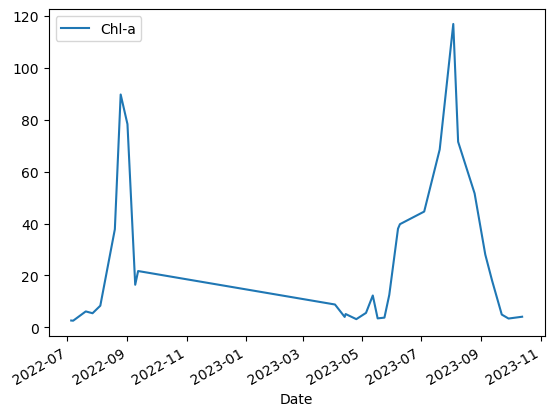

In [100]:
insitu_chl = pd.read_csv('data/chl-a/airthrey_chl.csv')
insitu_chl.Date = pd.to_datetime(insitu_chl.Date, dayfirst=True)
insitu_chl.plot(x='Date', y='Chl-a')
#sns.lineplot(data=sd_chla, x='Date', y='chl-a_J')
#sns.lineplot(data=dalec_chla, x='date', y='chl-a_J')

In [101]:
# not my finest work, but does the job
# by the way, the job being that we are finding the closest in-situ measurements to the superdoves data! 

selected_dates = []
date_diffs = []
selected_chl = []
for sd_date in sd_chla.date:
    date_deltas = []
    for ins_date in insitu_chl.Date:
        #print(ins_date)
        date_deltas.append(sd_date - ins_date)
    date_deltas = np.array(np.abs(date_deltas))
    min_ind = np.where(date_deltas==date_deltas.min())
    #print(min_ind)
    selected_dates.append(insitu_chl.Date[min_ind[0][0]])
    date_diffs.append(date_deltas[min_ind[0][0]])
    selected_chl.append(insitu_chl['Chl-a'][min_ind[0][0]])
    
selected_dates
sd_chla['insitu_chla'] =  selected_chl
sd_chla['insitu_date'] = selected_dates
sd_chla['insitu_date_diff'] = date_diffs

In [102]:
# not my finest work, but does the job
# by the way, the job being that we are finding the closest in-situ measurements to the superdoves data! 

selected_dates = []
date_diffs = []
selected_chl = []
selected_chl_J = []
for sd_date in insitu_chl.Date:
    date_deltas = []
    for ins_date in sd_chla.date:
        #print(ins_date)
        date_deltas.append(sd_date - ins_date)
    date_deltas = np.array(np.abs(date_deltas))
    min_ind = np.where(date_deltas==date_deltas.min())
    #print(min_ind)
    selected_dates.append(sd_chla.date[min_ind[0][0]])
    date_diffs.append(date_deltas[min_ind[0][0]])
    selected_chl.append(sd_chla['chl-a_J_cal'][min_ind[0][0]])
    selected_chl_J.append(sd_chla['chl-a_J'][min_ind[0][0]])
    
selected_dates
insitu_chl['sd_chl-a_J_cal'] =  selected_chl
insitu_chl['sd_chl-a_J'] =  selected_chl_J
insitu_chl['sd_date'] = selected_dates
insitu_chl['sd_date_diff'] = date_diffs

In [103]:
# do the same for the dalec
selected_dates = []
date_diffs = []
selected_chl = []
for sd_date in dalec_chla.date:
    date_deltas = []
    for ins_date in insitu_chl.Date:
        #print(ins_date)
        date_deltas.append(sd_date - ins_date)
    date_deltas = np.array(np.abs(date_deltas))
    min_ind = np.where(date_deltas==date_deltas.min())
    #print(min_ind)
    selected_dates.append(insitu_chl.Date[min_ind[0][0]])
    date_diffs.append(date_deltas[min_ind[0][0]])
    selected_chl.append(insitu_chl['Chl-a'][min_ind[0][0]])
    
selected_dates
dalec_chla['insitu_chla'] =  selected_chl
dalec_chla['insitu_date'] = selected_dates
dalec_chla['insitu_date_diff'] = date_diffs

In [104]:
def clean_chla_dates(row):
    if row['insitu_date_diff'] <= timedelta(5):
        return row['insitu_chla']
    else:
        return np.nan

sd_chla['insitu_chl_clean'] = sd_chla.apply(clean_chla_dates, axis=1)
dalec_chla['insitu_chl_clean'] = dalec_chla.apply(clean_chla_dates, axis=1)

In [105]:
# get dalec data match ups with min difference between sample date and dalec date
dalec_reduced = dalec_chla.loc[dalec_chla.groupby('insitu_date').insitu_date_diff.idxmin()]
dalec_reduced = dalec_reduced[dalec_reduced.insitu_date_diff<'5d']
#dalec_reduced = dalec_reduced[dalec_reduced.date.dt.year==2023]
dalec_reduced['month'] = dalec_reduced.date.dt.month
dalec_reduced['year'] = dalec_reduced.date.dt.year

In [106]:
len(sd_chla.insitu_chla.unique())

23

In [107]:
sd_reduced = sd_chla.loc[sd_chla.groupby('insitu_date').insitu_date_diff.idxmin()]
sd_reduced = sd_reduced[sd_reduced.insitu_date_diff<'100d']
sd_reduced #= sd_reduced[sd_reduced.date.dt.year==2023]
sd_reduced['year'] = sd_reduced.date.dt.year
len(sd_reduced)

23

In [108]:
insit_reduced = insitu_chl.loc[insitu_chl.groupby('sd_date').sd_date_diff.idxmin()]
insit_reduced = insit_reduced[insit_reduced.sd_date_diff<'100d']
insit_reduced #= sd_reduced[sd_reduced.date.dt.year==2023]
insit_reduced['year'] = insit_reduced.Date.dt.year
insit_reduced

,Date,Chl-a,sd_chl-a_J_cal,sd_chl-a_J,sd_date,sd_date_diff,year
0,2022-07-05,2.663,16.012227,71.289327,2022-07-04,1 days,2022
1,2022-07-07,2.592,36.448174,89.912786,2022-07-07,0 days,2022
2,2022-07-20,6.163,13.767117,70.505395,2022-07-10,10 days,2022
4,2022-08-04,8.361,18.063838,66.409166,2022-08-10,6 days,2022
5,2022-08-19,37.789,96.897912,92.800150,2022-08-20,1 days,2022
6,2022-08-25,89.650,121.577439,84.325807,2022-08-27,2 days,2022
8,2022-09-09,16.429,13.584096,55.068166,2022-09-10,1 days,2022
9,2022-09-12,21.707,16.583732,58.948442,2022-09-12,0 days,2022
10,2023-04-03,8.825,4.021700,56.323073,2023-04-03,0 days,2023
12,2023-04-14,5.158,2.506516,38.848170,2023-04-14,0 days,2023


In [109]:
insit_reduced[(insit_reduced['Chl-a']<10) & (insit_reduced['sd_chl-a_J_cal']>20)]

,Date,Chl-a,sd_chl-a_J_cal,sd_chl-a_J,sd_date,sd_date_diff,year
1,2022-07-07,2.592,36.448174,89.912786,2022-07-07,0 days,2022
13,2023-04-25,3.189,53.859349,91.797883,2023-04-22,3 days,2023
17,2023-05-24,3.776,40.546316,83.855665,2023-05-25,1 days,2023


In [110]:
sd_chla[sd_chla.date.isin(insit_reduced[(insit_reduced['Chl-a']<10) & (insit_reduced['sd_chl-a_J_cal']>20)].sd_date)]

,Date,date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_K_org,insitu_chla,insitu_date,insitu_date_diff,insitu_chl_clean
15,2022-07-07 11:04:17+00:00,2022-07-07,0.006363,0.002944,169.699086,227.582086,89.912786,36.448174,71.888734,2.592,2022-07-07,0 days,2.592
16,2022-07-07 11:04:19+00:00,2022-07-07,0.006571,0.003255,192.207496,216.062921,83.097701,29.093777,65.214743,2.592,2022-07-07,0 days,2.592
57,2023-04-22 11:03:21+00:00,2023-04-22,0.008580,0.003896,163.859791,230.904003,91.797883,53.859349,73.763001,3.189,2023-04-25,3 days,3.189
61,2023-05-25 10:29:54+00:00,2023-05-25,0.008377,0.004119,189.606010,217.307761,83.855665,40.546316,65.948864,3.776,2023-05-24,1 days,3.776


In [111]:
insitu_chl

,Date,Chl-a,sd_chl-a_J_cal,sd_chl-a_J,sd_date,sd_date_diff
0,2022-07-05,2.663,16.012227,71.289327,2022-07-04,1 days
1,2022-07-07,2.592,36.448174,89.912786,2022-07-07,0 days
2,2022-07-20,6.163,13.767117,70.505395,2022-07-10,10 days
3,2022-07-27,5.465,18.063838,66.409166,2022-08-10,14 days
4,2022-08-04,8.361,18.063838,66.409166,2022-08-10,6 days
5,2022-08-19,37.789,96.897912,92.800150,2022-08-20,1 days
6,2022-08-25,89.650,121.577439,84.325807,2022-08-27,2 days
7,2022-09-01,78.244,121.577439,84.325807,2022-08-27,5 days
8,2022-09-09,16.429,13.584096,55.068166,2022-09-10,1 days
9,2022-09-12,21.707,16.583732,58.948442,2022-09-12,0 days


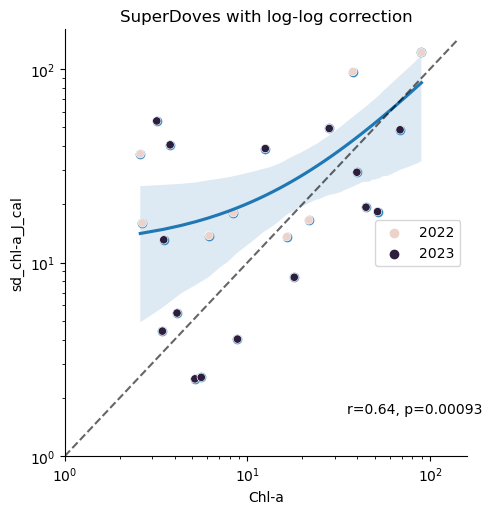

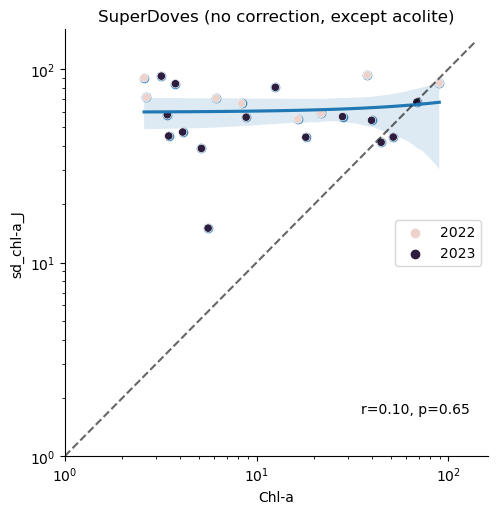

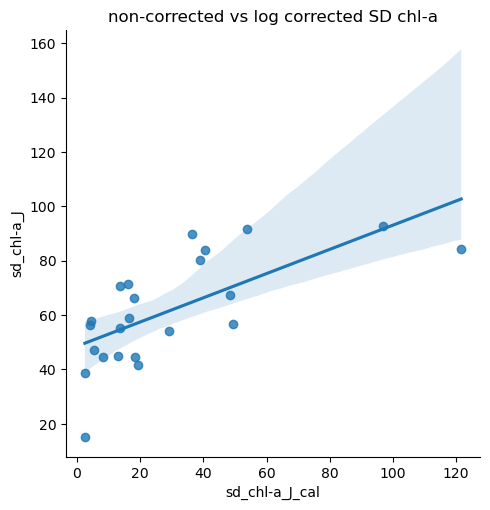

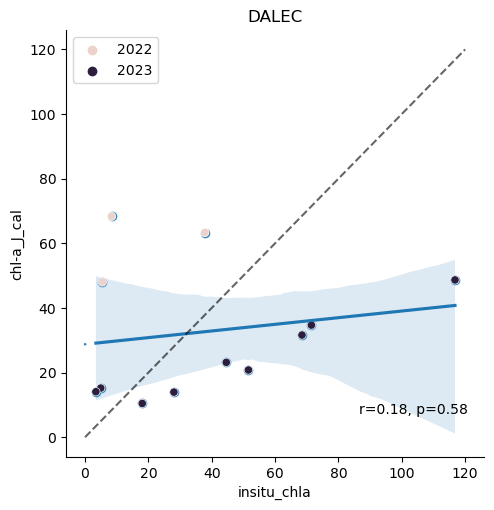

In [112]:
def annotate(data, x='insitu_chl_clean', y='chl-a_J_cal', order=1, plot=True, **kws):
    res = sp.stats.linregress(data.dropna()[x]**order, data.dropna()[y])
    ax = plt.gca()
    ax.text(0.7, 0.1, 'r={:.2f}, p={:.2g}'.format(res.rvalue, res.pvalue),
            transform=ax.transAxes)
    if plot:
        ax.plot([0.0001, 0.05],
                [res.intercept + res.slope*0.0001, res.intercept + res.slope*0.05])

g = sns.lmplot(data=insit_reduced, y='sd_chl-a_J_cal', x='Chl-a',
               legend=False)
sns.scatterplot(data=insit_reduced, y='sd_chl-a_J_cal', x='Chl-a',
                hue='year', 
                #style='date',
                legend=True)
g.map_dataframe(annotate, x='Chl-a', y='sd_chl-a_J_cal', plot=False)

plt.legend(loc='center right')
plt.plot([1, 140],[1, 140], 'k--', alpha=0.6)
plt.gca().set_title('SuperDoves with log-log correction')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1, 160)
plt.xlim(1, 160)

plt.show()

g = sns.lmplot(data=insit_reduced, y='sd_chl-a_J', x='Chl-a',
               legend=False)
sns.scatterplot(data=insit_reduced, y='sd_chl-a_J', x='Chl-a',
                hue='year', 
                #style='date',
                legend=True)
g.map_dataframe(annotate, x='Chl-a', y='sd_chl-a_J', plot=False)

plt.legend(loc='center right')
plt.plot([1, 140],[1, 140], 'k--', alpha=0.6)
plt.gca().set_title('SuperDoves (no correction, except acolite)')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1, 160)
plt.xlim(1, 160)

plt.show()

g = sns.lmplot(data=insit_reduced, y='sd_chl-a_J', x='sd_chl-a_J_cal',
               legend=False)
plt.title('non-corrected vs log corrected SD chl-a')

# sns.scatterplot(data=sd_chla, y='chl-a_J_cal', x='date',
#                     hue='date', style='date', legend=False)

    
#g.map_dataframe(annotate)

g = sns.lmplot(data=dalec_reduced, y='chl-a_J_cal', x='insitu_chla')
sns.scatterplot(data=dalec_reduced, y='chl-a_J_cal', x='insitu_chla',
                hue='year',
                #hue='month',
               )

g.map_dataframe(annotate, x='insitu_chla')
plt.plot([0, 120], [0, 120], 'k--', alpha=0.6)
plt.legend()
plt.gca().set_title('DALEC')
plt.show()

# Now SuperDoves is pretty good!

- I've averaged over a larger no. of pixels (20x20) (60x60 m)
    - think this helps a bit
- Using "log regression correction" of Rrs_666, Rrs_707
    - this seems to be really important, I so I wonder if this is justifiable...
- Think I need to understand why I have 2 superdoves points which are well above the line.
    - I have a note saying that there were large concs of windblown debris (algal and other floral) on the 7th of June 2023.
    - Notes from 19th Aug 2022 don't have any revealing details. I did note slight rain that day and presence of cyano communities..
    - image from 19th Aug looks good on precursory glance. Water is v green that day. Not much obvious spatial variation, and averaging over 400 pixels should avoid that anyways... 

In [113]:
insit_reduced[insit_reduced['sd_chl-a_J_cal']>100]

,Date,Chl-a,sd_chl-a_J_cal,sd_chl-a_J,sd_date,sd_date_diff,year
6,2022-08-25,89.65,121.577439,84.325807,2022-08-27,2 days,2022


In [114]:
dalec_chla.loc[dalec_chla.groupby('insitu_date').insitu_date_diff.idxmin()]

,date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_J_cal_COR,chl-a_K_org,insitu_chla,insitu_date,insitu_date_diff,insitu_chl_clean
0,2022-07-28,0.006881,0.005111,345.352535,161.820021,44.256417,48.032450,2.877338,30.978225,5.465,2022-07-27,1 days,5.465
4,2022-08-03,0.006902,0.004405,286.552367,179.610246,58.337357,68.338391,8.225084,42.523879,8.361,2022-08-04,1 days,8.361
15,2022-08-15,0.012529,0.008285,300.317722,175.209828,54.984102,63.316156,20.686778,39.671626,37.789,2022-08-19,4 days,37.789
16,2023-07-08,0.012693,0.011963,433.833537,138.805661,23.948273,23.163608,2.503777,16.759689,44.595,2023-07-04,4 days,44.595
28,2023-07-20,0.012146,0.010448,400.766040,146.989370,31.435913,31.611369,3.678966,21.604715,68.487,2023-07-20,0 days,68.487
42,2023-08-03,0.013460,0.009947,343.395302,162.374000,44.716151,48.660970,13.014366,31.336204,116.800,2023-08-03,0 days,116.800
47,2023-08-08,0.008639,0.007212,389.640037,149.846070,33.981778,34.689721,2.478715,23.365556,71.458,2023-08-08,0 days,71.458
63,2023-08-25,0.009918,0.009620,443.976501,136.379638,21.675548,20.796372,3.372646,15.397542,51.580,2023-08-25,0 days,51.580
71,2023-09-06,0.010181,0.010866,476.714764,128.789576,14.422856,13.950078,6.023613,11.440653,28.054,2023-09-05,1 days,28.054
77,2023-09-12,0.004770,0.005409,496.591449,124.345268,10.088103,10.443974,26.638229,9.398362,18.055,2023-09-12,0 days,18.055


## so, is the chl-a algorithm working?

- I've been trying algorithms based on the NIR band ratio with bands 707, 666
- the results I get with dalec data show some promise:
    - there is a clear positive correlation, suggesting that with proper tuning we could probably get this algorithm to give good results.
- but, the planet data doesn't seem to work for this
    - no obvious correlation

## Options

- explore alternative algorithms:
    - if I assume my match up validation with DALEC data is good then I would need to find algorithms which only use the bands which fit well
    - I think the NIR ratio 707/666 isn't good with the planet data
    - Claire Neil's paper https://www.sciencedirect.com/science/article/pii/S0034425719301786#s0010 doesn't seem to look at any other algorithms which would work well with the bands which appear to be good.
    
- OR maybe the issue is that I need to exclude some planet images. 
    - think this should be the first port of call! - it might reduce the number of data points, but hopefully will massively improve my life.

### How to exclude / flag potentially bad images

- planet has udm2 data which provides masks for snow, shadow, light haze, heavy haze, cloud 
- these files are the `....udm2_clip.tif` files in the PSScene folders
- now, on inspection, it seems that these aren't perfect. 
    - they seem to catch large clouds and shadows, but miss smaller features which I can recognise by eye in the RGB images
    - so far, I haven't found any cases where the udm2 mask identifies features that I can't see by eye.
    - therefore, probably best to rely largely on visual inspection!
- but, for a paper it might be good to have done the cleaning of images using both udm2 and visual inspection (this just sounds more pro, and does provide a double check in some ways)


### Some other ideas
- Correct the SD to match the DALEC better using the linear regression coeffs from dalec-sd match up.
    - I've just quickly implemented this by adding m707, c707 etc to the Chl-a_J() method
    - this actually improves the superdoves fit to the in-situ chl-a, making it +ve. But still not statistically significant
    - looks like outliers are causing the poor fit issue. I wonder if these are pixels affected by macrophytes or something like that. might be worth looking at the outlier images themselves to see if I can identify the issue
- Interpolate the in-situ chl-a to daily values and get more points for the match ups


0     2022-07-05
1     2022-07-06
2     2022-07-07
3     2022-07-08
4     2022-07-09
         ...    
461   2023-10-09
462   2023-10-10
463   2023-10-11
464   2023-10-12
465   2023-10-13
Name: date, Length: 466, dtype: datetime64[ns]

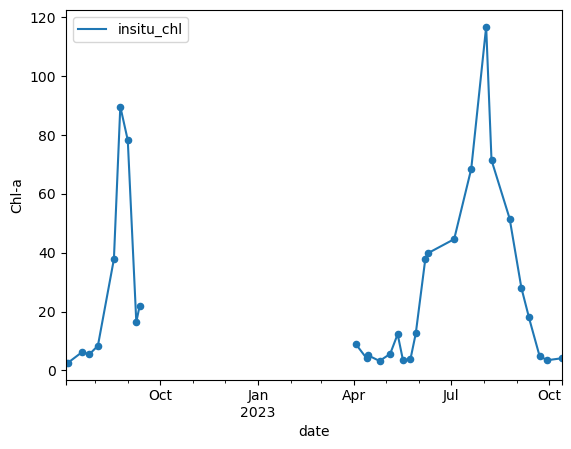

In [125]:
fig, ax = plt.subplots(1,1)
insitu_chl_daily = insitu_chl.copy().set_index('Date')
insitu_chl.plot(x='Date', y='Chl-a', ax=ax, kind='scatter')
#print(insitu_chl_daily.isna())
# 2022-09-12
# 2023-04-03
insitu_chl_daily = insitu_chl_daily.resample('1d').asfreq().reset_index()
insitu_chl_daily['Chl-a'] = insitu_chl_daily['Chl-a'].interpolate()#method='spline', order=3)
insitu_chl_daily.loc[(insitu_chl_daily['Date']>'2022-09-12') & (insitu_chl_daily['Date']<'2023-04-03'), 'Chl-a'] = np.nan
insitu_chl_daily.rename({'Date':'date', 'Chl-a':'insitu_chl'}, inplace=True, axis=1) 
insitu_chl_daily['date'] 
insitu_chl_daily.plot(x='date', y='insitu_chl', ax=ax)
insitu_chl_daily = insitu_chl_daily[['date', 'insitu_chl']]
insitu_chl_daily.date

### This looks good! 

- if I linearly interpolate insitu chl-a to daily values, and match up with DALEC data (ONLY 2023), then we get a strong correlation, which seems to follow a quadratic curve pretty well
- possibly the quadratic relationship might change if I change the interpolation from linear to something else

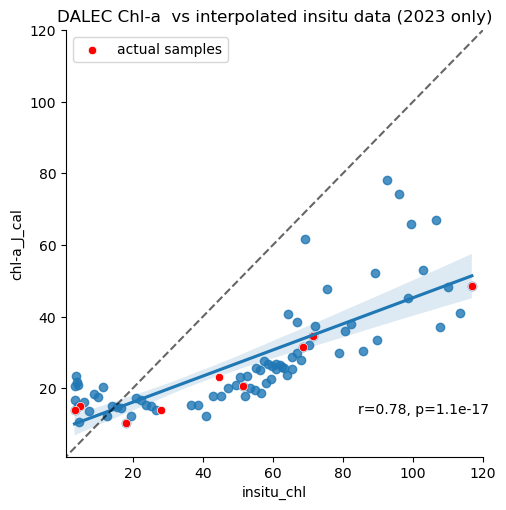

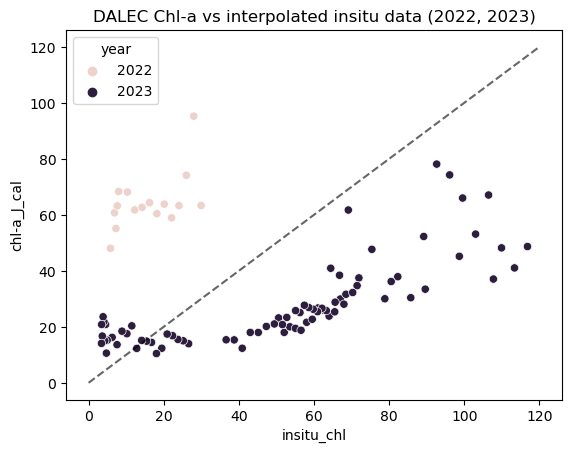

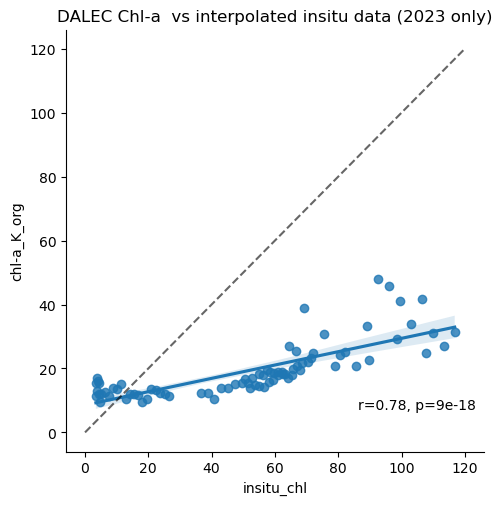

In [142]:
dalec_insi_daily = dalec_chla.merge(insitu_chl_daily, on='date')
dalec_insi_daily['year'] = dalec_insi_daily.date.dt.year
g = sns.lmplot(data=dalec_insi_daily[dalec_insi_daily.year==2023], x='insitu_chl', y='chl-a_J_cal', order=1,)
sns.scatterplot(data=dalec_reduced[dalec_reduced['year']==2023],
                y='chl-a_J_cal', x='insitu_chla',
                label='actual samples', color='r',
                #hue='month',
               )
g.map_dataframe(annotate, x='insitu_chl', y='chl-a_J_cal', plot=False,order=1)
plt.gca().plot([0, 120], [0, 120], 'k--', alpha=0.6)
plt.title('DALEC Chl-a  vs interpolated insitu data (2023 only)')
#plt.yscale('log')
#plt.xscale('log')
plt.xlim(1, 120)
plt.ylim(1, 120)
plt.legend()
plt.show()


#g = sns.lmplot(data=dalec_insi_daily, x='insitu_chl', y='chl-a_J_cal', hue='year', order=1)
g = sns.scatterplot(data=dalec_insi_daily, x='insitu_chl', y='chl-a_J_cal', hue='year')

#g.map_dataframe(annotate, x='insitu_chl', y='chl-a_J_cal', order=2)
plt.gca().plot([0, 120], [0, 120], 'k--', alpha=0.6)
plt.title('DALEC Chl-a vs interpolated insitu data (2022, 2023)')
plt.show()

g = sns.lmplot(data=dalec_insi_daily[dalec_insi_daily.year==2023], x='insitu_chl', y='chl-a_K_org', order=1)
g.map_dataframe(annotate, x='insitu_chl', y='chl-a_K_org', plot=False,order=1)
plt.gca().plot([0, 120], [0, 120], 'k--', alpha=0.6)
plt.title('DALEC Chl-a  vs interpolated insitu data (2023 only)')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlim(1, 120)
#plt.ylim(1, 120)

plt.show()

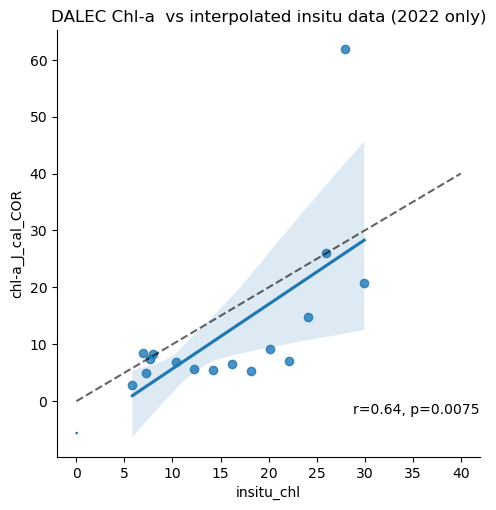

In [129]:
dalec_insi_daily = dalec_chla.merge(insitu_chl_daily, on='date')
dalec_insi_daily['year'] = dalec_insi_daily.date.dt.year
g = sns.lmplot(data=dalec_insi_daily[dalec_insi_daily.year==2022], x='insitu_chl', y='chl-a_J_cal_COR', order=1)
g.map_dataframe(annotate, x='insitu_chl', y='chl-a_J_cal_COR', order=1)
plt.gca().plot([0, 40], [0, 40], 'k--', alpha=0.6)
plt.title('DALEC Chl-a  vs interpolated insitu data (2022 only)')
plt.show()

### This is interesting...
- doing the daily interp of the insitu chl-a data doesn't really make the SD data look any better - we still have a very poor fit and I've had to remove some data points which were REALLY high.
- but colouring by month we see the in-situ data is fairly well ordered by month (perhaps due to interpolation?)
- I think the key will be to work out what the images with high SD chla in Apr, Oct are

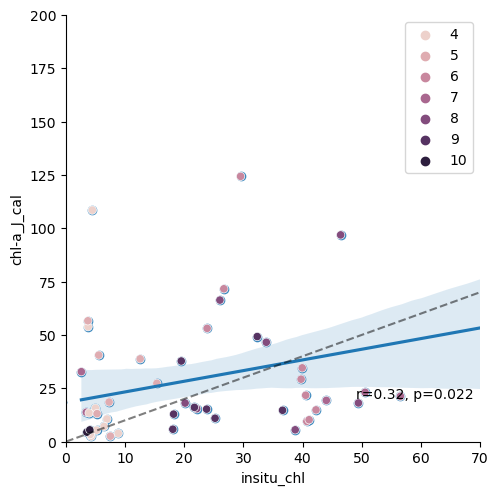

In [130]:
insi_sd_daily = sd_chla.merge(insitu_chl_daily, on='date')
insi_sd_daily = insi_sd_daily.groupby('date').median().reset_index()
insi_sd_daily['year'] = insi_sd_daily.date.dt.year
insi_sd_daily['month'] = insi_sd_daily.date.dt.month


g = sns.lmplot(data=insi_sd_daily[insi_sd_daily['chl-a_J_cal']<200], 
               x='insitu_chl', y='chl-a_J_cal', order=1)
sns.scatterplot(data=insi_sd_daily[insi_sd_daily['chl-a_J_cal']<200],
                x='insitu_chl', y='chl-a_J_cal',
                hue='month')

g.map_dataframe(annotate, x='insitu_chl', y='chl-a_J_cal', order=1)

plt.plot([0, 200], [0, 200], 'k--', alpha=0.5)
plt.ylim(0, 200)
plt.xlim(0, 70)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()


In [131]:
dalec_insi_daily

,date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_J_cal_COR,chl-a_K_org,insitu_chla,insitu_date,insitu_date_diff,insitu_chl_clean,insitu_chl,year
0,2022-07-28,0.006881,0.005111,345.352535,161.820021,44.256417,48.032450,2.877338,30.978225,5.465,2022-07-27,1 days,5.465,5.827000,2022
1,2022-07-31,0.008219,0.005539,307.642067,172.932686,53.215789,60.712332,8.402087,38.192086,5.465,2022-07-27,4 days,5.465,6.913000,2022
2,2022-08-01,0.007481,0.005256,323.850173,168.037859,49.337332,55.114736,5.016023,35.009457,8.361,2022-08-04,3 days,8.361,7.275000,2022
3,2022-08-02,0.007381,0.004886,300.679656,175.096293,54.896474,63.186385,7.458227,39.597900,8.361,2022-08-04,2 days,8.361,7.637000,2022
4,2022-08-03,0.006902,0.004405,286.552367,179.610246,58.337357,68.338391,8.225084,42.523879,8.361,2022-08-04,1 days,8.361,7.999000,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2023-09-26,0.005212,0.004990,439.400365,137.469566,22.699486,21.850718,11.647726,16.004530,3.424,2023-09-29,3 days,3.424,4.079286,2023
92,2023-09-27,0.004661,0.004372,432.093617,139.225599,24.339290,23.580666,12.642980,16.999431,3.424,2023-09-29,2 days,3.424,3.860857,2023
93,2023-09-28,0.003415,0.003499,462.897557,131.950061,17.467749,16.685306,27.373055,13.025281,3.424,2023-09-29,1 days,3.424,3.642429,2023
94,2023-09-29,0.002448,0.002607,476.079244,128.933628,14.562360,14.070697,41.643229,11.510666,3.424,2023-09-29,0 days,3.424,3.424000,2023


In [132]:
insitu_chl_daily['year'] = insitu_chl_daily.date.dt.year

In [133]:
insitu_chl['year'] = insitu_chl.Date.dt.year

## Calibrating DALEC 2022 data using SD log-log correction is effective!

- this pulls down the 707 nm band which lowers the chl-a estimate
- this means that the DALEC data from 2022 matches well with both in-situ measurements and the SDs chl-a estimates


What does this mean?

- we are only using 2 bands in a ratio to calc. chl-a
- therefore, closely matching in-situ chl-a to Remote sensing chl-a does not neccesarily mean the spectra we're using are fully accurate
- indeed, the DALEC spectra from 2022 may be better representative, but they do suggest a different OWT, which might mean that the chl-a algorithm we're using is not suitable
- by adjusting spectra using the log-log correction, we make the spectra more suitable for the band-ratio chl-a algorithm
- none of this can explain why dalec 2022 is so different from 2023, but it does suggest that a chl-a signal is present in the 707/666 bands.


**idea**

- maybe dalec '22 and all SDs data has a stronger macrophyte, or bottom effect signal than dalec '23
- therefore, we need to adjust for this 
- but my knowledge of spectra isn't good enough to say with much certainty
- would be really good to ask Vagelis and Peter what they think is going on
    - need to prep some spectra for our next meeting.

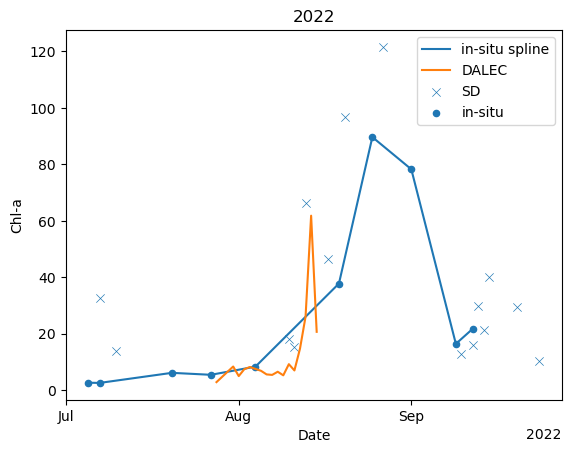

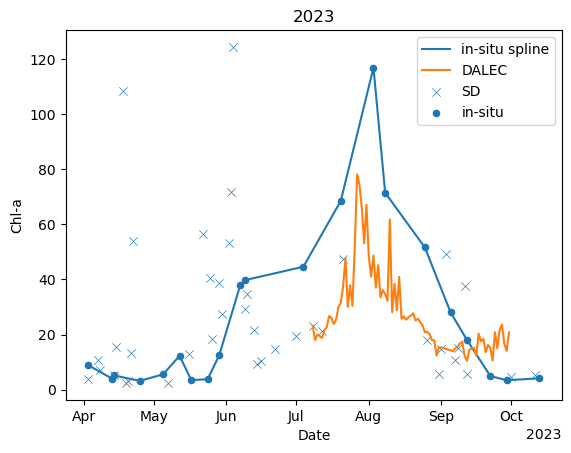

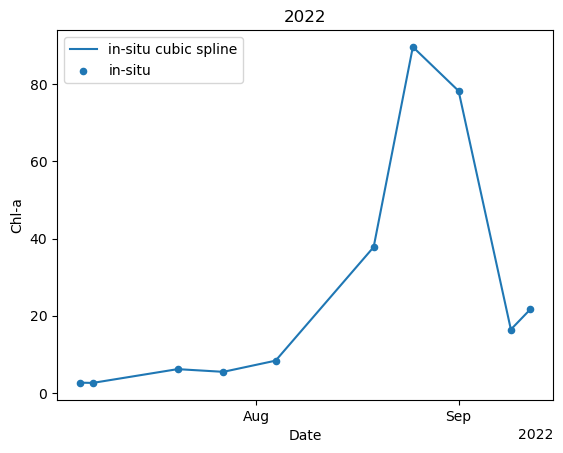

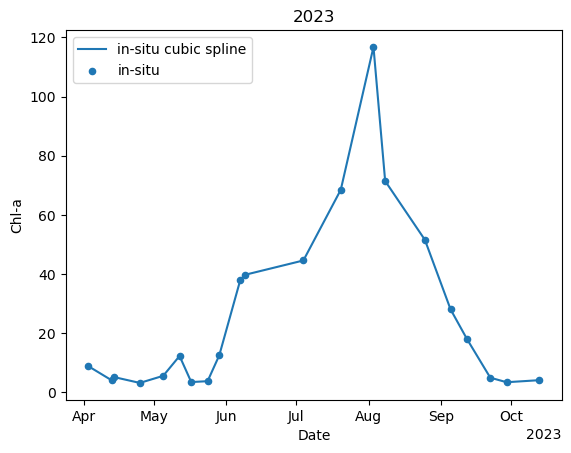

In [134]:
for year, dalec_alg in zip([2022, 2023], ['chl-a_J_cal_COR', 'chl-a_J_cal']):
    sns.lineplot(data=insitu_chl_daily[insitu_chl_daily.year==year],
                 x='date', y='insitu_chl', label='in-situ spline')
    sns.lineplot(data=dalec_insi_daily[dalec_insi_daily.date.dt.year==year], 
                 x='date', y=dalec_alg, label='DALEC')
    #g = sns.lineplot(data=insi_sd_daily[insi_sd_daily.year==year],
    #                    x='date', y='chl-a_J_cal', label='SD')
    g = sns.scatterplot(data=insi_sd_daily[insi_sd_daily.year==year],
                        x='date', y='chl-a_J_cal', marker='x', label='SD')

    insitu_chl[insitu_chl.year==year].plot(x='Date', y='Chl-a', ax=plt.gca(), kind='scatter', label='in-situ')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(4, 5, 6, 7, 8, 9, 10)))
    plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    plt.legend(loc='upper right')
    plt.gca().set_title(str(year))
    #plt.yscale('log')
    plt.show()
    
for year in [2022, 2023]:
    #g = sns.scatterplot(data=insi_sd_daily[insi_sd_daily.year==year],
    #                    x='date', y='chl-a_J_cal', marker='x', label='SD')
    sns.lineplot(data=insitu_chl_daily[insitu_chl_daily.year==year],
                 x='date', y='insitu_chl', label='in-situ cubic spline')
    #sns.lineplot(data=dalec_insi_daily[dalec_insi_daily.date.dt.year==year], 
    #             x='date', y='chl-a_J_cal', label='DALEC')

    insitu_chl[insitu_chl.year==year].plot(x='Date', y='Chl-a', ax=plt.gca(), kind='scatter', label='in-situ')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(4, 5, 6, 7, 8, 9, 10)))
    plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    plt.legend()
    plt.gca().set_title(str(year))
    plt.show()

# Where am I at now?

- adjusting superdoves to match planet more closely using log-log regression has been pretty effective! 
- with the current chl-a algorithm (J_cal), I'm finding that we get a significant regression line, despite a few possibly spurious outliers
- probably need to investigate these outliers more closely and work out if there's something we can do about them?
    - there may be some cases where the outlier is actually a fairly good measurement showing something that the interpolation has smoothed over (eg. data gap in mid-June 2023, or Aug 2022)
    - some points do look spurious though - early June 2023
        - I have a note saying that there were large concs of windblown debris (algal and other floral) on the 7th of June.
        - possibly this could explain these really high values

In [68]:
insi_sd_daily[insi_sd_daily.date.dt.month==6]

,date,Date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_K_org,insitu_chla,insitu_date,insitu_date_diff,insitu_chl_clean,insitu_chl,year,month
32,2023-06-02,2023-06-02 10:28:55+00:00,0.012317,0.006329,204.955161,210.224605,79.470617,53.076842,61.731231,12.530,2023-05-29,4 days,12.530,23.790721,2023,6
33,2023-06-03,2023-06-03 10:29:51+00:00,0.023349,0.013297,242.722607,194.892947,69.350073,71.631729,52.286171,38.008,2023-06-07,4 days,38.008,26.582915,2023,6
34,2023-06-04,2023-06-04 10:26:56+00:00,0.024873,0.011169,160.503183,232.892982,92.910043,124.351111,74.874283,38.008,2023-06-07,3 days,38.008,29.322110,2023,6
35,2023-06-09,2023-06-09 11:08:06+00:00,0.016255,0.010832,303.274264,174.285499,54.269052,29.258068,39.071257,39.744,2023-06-09,0 days,39.744,39.744000,2023,6
36,2023-06-10,2023-06-10 10:31:16+00:00,0.013078,0.007778,259.266253,188.867139,65.122722,34.560474,48.470796,39.744,2023-06-09,1 days,39.744,42.476774,2023,6
37,2023-06-13,2023-06-13 10:25:48.500000+00:00,0.010251,0.006313,270.205683,185.259319,62.430249,21.727549,46.140198,39.744,2023-06-09,4 days,39.744,46.384017,2023,6
38,2023-06-14,2023-06-14 11:22:14+00:00,0.010329,0.007371,329.870749,166.266784,47.907753,9.452895,33.858886,39.744,2023-06-09,5 days,39.744,47.333796,2023,6
39,2023-06-16,2023-06-16 10:27:59.500000+00:00,0.007099,0.004424,277.218907,182.693274,60.636287,10.230036,44.513823,39.744,2023-06-09,7 days,NaN,48.758617,2023,6
40,2023-06-22,2023-06-22 11:07:43+00:00,0.012486,0.008795,324.822985,167.750026,49.105952,14.857433,34.822392,44.595,2023-07-04,12 days,NaN,49.885749,2023,6


In [69]:
Rrs_708_666 = sds_med[sds_med.Wavelength==707.0].Rrs_sd.values / sds_med[sds_med.Wavelength==666.0].Rrs_sd.values

In [70]:
ratio_df = pd.DataFrame(data={'Date':sds_med[sds_med.Wavelength==707.0].Date,
                              'date':sds_med[sds_med.Wavelength==707.0].date, 
                              'Rrs_708_666':Rrs_708_666})
ratio_df

,Date,date,Rrs_708_666
6,2022-04-19 10:47:11+00:00,2022-04-19,1.578683
14,2022-04-19 10:47:13+00:00,2022-04-19,1.631935
22,2022-04-23 10:26:57+00:00,2022-04-23,2.132610
30,2022-04-23 10:26:59+00:00,2022-04-23,2.131413
38,2022-04-24 11:16:56+00:00,2022-04-24,1.486303
...,...,...,...
822,2023-09-11 10:30:46+00:00,2023-09-11,1.562393
830,2023-09-12 10:32:01+00:00,2023-09-12,1.348111
838,2023-09-12 11:11:16+00:00,2023-09-12,1.148686
846,2023-10-01 11:10:51+00:00,2023-10-01,1.560670


In [71]:
sd_chla

,Date,date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_K_org,insitu_chla,insitu_date,insitu_date_diff,insitu_chl_clean
0,2022-04-19 10:47:11+00:00,2022-04-19,0.009290,0.005885,283.588498,180.579715,59.064919,15.604604,43.150545,2.663,2022-07-05,77 days,NaN
1,2022-04-19 10:47:13+00:00,2022-04-19,0.007516,0.004606,270.749518,184.877164,62.242031,12.704134,45.918460,2.663,2022-07-05,77 days,NaN
2,2022-04-23 10:26:57+00:00,2022-04-23,0.005446,0.002554,173.913865,225.281610,88.586724,28.304408,70.577450,2.663,2022-07-05,73 days,NaN
3,2022-04-23 10:26:59+00:00,2022-04-23,0.005374,0.002521,174.093868,225.185032,88.530680,27.723192,70.522163,2.663,2022-07-05,73 days,NaN
4,2022-04-24 11:16:56+00:00,2022-04-24,0.007158,0.004816,307.019422,173.124622,53.365714,6.187189,38.316851,2.663,2022-07-05,72 days,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2023-09-11 10:30:46+00:00,2023-09-11,0.017587,0.011256,287.613580,179.265089,58.077354,37.772731,42.300597,18.055,2023-09-12,1 days,18.055
103,2023-09-12 10:32:01+00:00,2023-09-12,0.011000,0.008159,344.812706,161.972586,44.383165,8.390687,31.076781,18.055,2023-09-12,0 days,18.055
104,2023-09-12 11:11:16+00:00,2023-09-12,0.011789,0.010263,405.149121,145.878926,30.436652,3.192101,20.928552,18.055,2023-09-12,0 days,18.055
105,2023-10-01 11:10:51+00:00,2023-10-01,0.005363,0.003436,288.041913,179.126065,57.972485,4.422178,42.210638,3.424,2023-09-29,2 days,3.424


<Axes: xlabel='date', ylabel='chl-a_J_cal'>

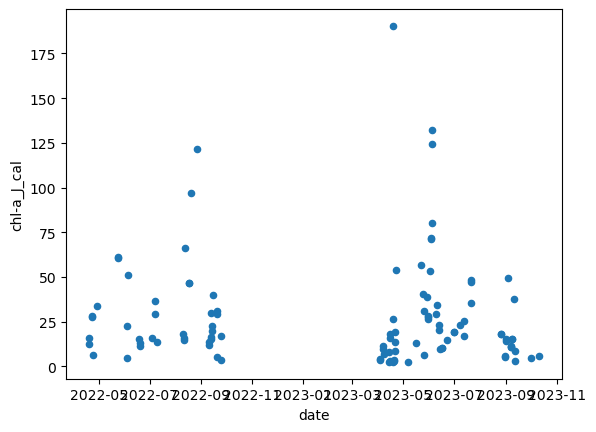

In [72]:
sd_chla.plot(x='date', y='chl-a_J_cal', kind='scatter')